Recordar consultar el [Diccionario de datos](./Datasets/Google%20Maps/Diccionario%20de%20datos.docx)


# Importaciones


In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import geopy
from geopy.geocoders import Nominatim

# Llamado de datos a dataframes


In [309]:
df_maps_restaurantes = pd.read_parquet(r"Generated\Google\metada_sitios.parquet")
df_maps_reviews = pd.read_parquet(r"Generated\Google\merge_site_reviews.parquet")
df_yelp_restaurantes = pd.read_parquet(r"Generated\Yelp\bussines.parquet")
df_yelp_checkin = pd.read_parquet(r"Generated\YELP\business_checkin.parquet")
df_yelp_tips = pd.read_parquet(r"Generated\Yelp\business_tip.parquet")
df_yelp_reviews = pd.read_parquet(r"Generated\Yelp\review.parquet")
df_yelp_users = pd.read_parquet(r"Generated\Yelp\users_extracted.parquet")

KeyboardInterrupt: 

### Subway

es la empresa con la que trabajaremos, empezaremos por ver cuantos registros hay en cada Dataframe


In [ ]:
subway_records_rest = df_yelp_restaurantes.loc[df_yelp_restaurantes["name"] == "Subway"]
count_subway_records_rest = subway_records_rest.shape[0]
print("Número de registros de Subway en restaurantes:", count_subway_records_rest)

Número de registros de Subway en restaurantes: 227


In [ ]:
subway_records_checkin = df_yelp_checkin.loc[df_yelp_checkin["name"] == "Subway"]
count_subway_records_checkin = subway_records_checkin.shape[0]
print("Número de registros de Subway en checkin:", count_subway_records_checkin)

Número de registros de Subway en checkin: 7


In [ ]:
subway_records_tips = df_yelp_tips.loc[df_yelp_tips["name"] == "Subway"]
count_subway_records_tips = subway_records_tips.shape[0]
print("Número de registros de Subway tips:", count_subway_records_tips)

Número de registros de Subway tips: 79


Para revisar el dataframe de reviews y el de usuarios, deberemos obtener el Business_id y usarlo de guía

Para eso, crearemos una lista que contenga todos los business_id que correspondan a locales de Subway, luego crearemos un dataframe que contenga todas las reviews de subway y uno que contenga todos los usuarios que realizaron reviews


In [ ]:
(df_yelp_restaurantes.loc[df_yelp_restaurantes["name"] == "Subway"]).head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
964,vuL3QCjFZ7lU5LMdUAmZ9Q,Subway,383 W Lancaster Ave,Wayne,FL,19087,40.044263,-75.399354,1.5,5,False,None,"Sandwiches, Fast Food, Restaurants",None


In [ ]:
subway_business_ids = df_yelp_restaurantes.loc[
    df_yelp_restaurantes["name"] == "Subway", "business_id"
].tolist()
len(subway_business_ids)

227

In [ ]:
reviews_yelp_subway = df_yelp_reviews[
    df_yelp_reviews["business_id"].isin(subway_business_ids)
]
reviews_yelp_subway

,review_id,user_id,business_id,stars,funny,cool,text,date
598,CEHaucuAzqSzOdMB3mPNTA,jsej79maZJg_X619aw8dig,1QtF1bFgzG3Jo0-L4kv0Cg,2,0,0,This place was slow and didn't have any deals ...,2017-10-24
6462,3kLKI7hBik4xKy_FUPXXTQ,uZ_F1KUH5V04eMBYEXr6Xw,wXBAAafoiZ4Nty2ajuBtfw,4,1,1,I don't normally review fast-food chains but I...,2017-08-02
7365,CYK_xEubeGE6fxwwwZqiyA,YazB4ROLMQ6-jvDfumvijA,zJdQwRbI7p0bH_60sfBSYA,5,0,0,This Subway location knows how to handle their...,2017-05-03
9586,0pgkcbEjVNbRdN8BWgYSdg,KG8SNh9SITNPrGa6IdQcsg,DfkO7MHuy2wxgeUZ2-o3BA,1,0,0,We actually went to the subway at 204 St. Char...,2017-04-03
11232,E1UPtQToxHDJlA9SBnft1w,0DK-fg2ZBnpkMKnU9SgPMQ,qBvsNlxtqy8hPxx1C7HuVA,4,1,3,I never realized there was a subway this close...,2017-04-13
...,...,...,...,...,...,...,...,...
541804,uz00Jmfo94oHYmNQNcNq_g,aOiElbImAVfYUulkyrnnqA,-x-niT6JolhXi6VuKclgxw,1,0,0,Usually this place is good when the younger gi...,2019-04-24
543833,h2oZkwhsOTmJtfbkNeBnew,QqTZgY7Kx1-fec-IFSKqMA,F0QWKYUmBkxWOap1xspVzw,1,1,1,Omg gross!!! Whats the point of washing your h...,2017-09-02
544036,qrKB3TcNYh0OP45jK-Suvw,3R_WZTTbbAV9zbkwvEAIsw,F0QWKYUmBkxWOap1xspVzw,2,0,0,"Sandwhiches, are as good as subway can make th...",2018-03-06
549237,4MXcgkYsGOycBy2LWBHRsg,ffNVkYsl23SMCKKW6u923A,cdbEEL_0TLOPgdfsB3PUvA,4,1,1,Ate there today good service and fresh food. T...,2019-06-16


Ahora, obtendremos los usuarios

Para hacer esto, obtendremos los user_id de nuestro recien creado **reviews_yelp_subway** y los usaremos como filtro para obtener los usuarios que han cualificado a algun local de subway, ademas, agregaremos una columna que contara cuantas reviews han hecho a subway


In [ ]:
df_yelp_users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,14


In [ ]:
unique_user_ids = reviews_yelp_subway["user_id"].unique()
filtered_users = df_yelp_users[df_yelp_users["user_id"].isin(unique_user_ids)]
subway_count = (
    reviews_yelp_subway.groupby("user_id").size().reset_index(name="subway_count")
)
yelp_users_subway = filtered_users.merge(subway_count, on="user_id", how="left")
yelp_users_subway["subway_count"] = yelp_users_subway["subway_count"].fillna(0)
yelp_users_subway.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,subway_count
0,EvJ1yXjsBqK_NH493WdA6A,Kate,171,2010-02-14 00:51:06,288,24,143,"[2011, 2012, 2013, 2014, 2015, 2016, 2017, 201...","7K4SzSIG9zUzBLCh0gHNjA, s5txUZuoj4gNHQ3UY9Dnrg...",15,...,0,0,19,25,38,38,11,3,9,1


# Outlieers


## df_yelp_checkin

Se realiza un boxplot de la puntiación de estrellas y de la cantidad de reviews para visualizar posibles outliers


In [ ]:
df_yelp_checkin.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."


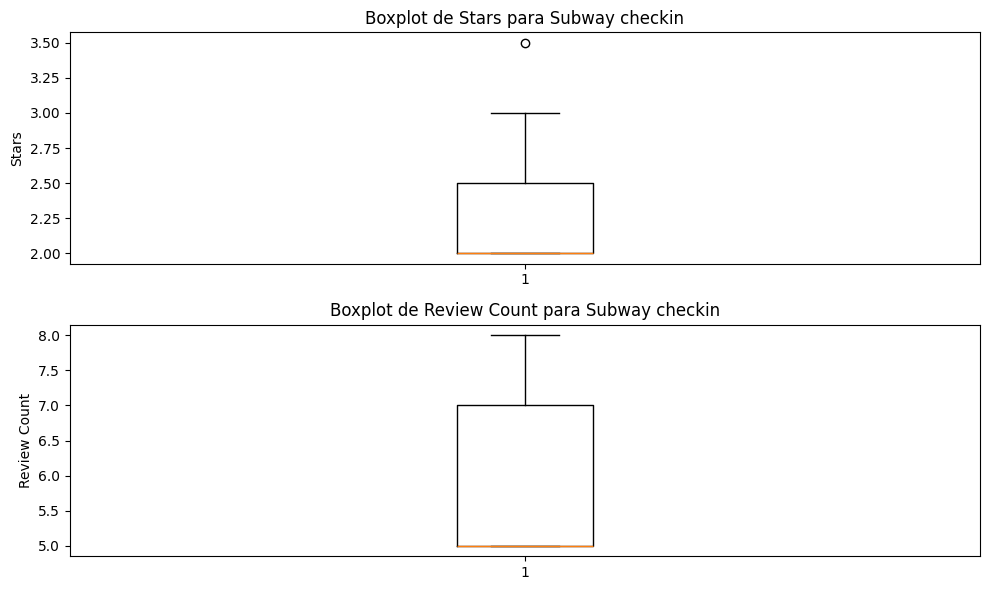

In [ ]:
subway_data_checkin = df_yelp_checkin[df_yelp_checkin["name"] == ("Subway")]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_data_checkin["stars"])
plt.title("Boxplot de Stars para Subway checkin")
plt.ylabel("Stars")

plt.subplot(2, 1, 2)
plt.boxplot(subway_data_checkin["review_count"])
plt.title("Boxplot de Review Count para Subway checkin")
plt.ylabel("Review Count")

plt.tight_layout()
plt.show()

In [ ]:
df_yelp_checkin[
    (df_yelp_checkin["name"] == "Subway") & (df_yelp_checkin["stars"] == 3.5)
]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
1712,Om6OwVsJ_t2XHQBYKnlcHg,Subway,10551 Kingsway Avenue,Edmonton,PA,T5H 4K1,53.557377,-113.502513,3.5,5,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '9:0-22:0', 'Monday': '9:0-22:0', '...",2019-09-09 02:37:26


Vamos a quitar todas aquellas categorias que solo se repiten una vez, pero primero vamos a recorrerlas para tener una noción de lo que tratan


In [ ]:
categorias = df_yelp_checkin["categories"].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {
    categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)
}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:89]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")

Las menos repetidas son:
Wine Tours: 2 veces
Burmese: 2 veces
Polish: 2 veces
Home Decor: 2 veces
Champagne Bars: 2 veces
Ethnic Food: 2 veces
Books: 2 veces
Naturopathic/Holistic: 2 veces
Piano Bars: 2 veces
Nicaraguan: 2 veces
Cooking Classes: 2 veces
Hair Salons: 2 veces
Cigar Bars: 2 veces
Music & Video: 2 veces
Do-It-Yourself Food: 2 veces
Jazz & Blues: 2 veces
Couriers & Delivery Services: 2 veces
Day Spas: 2 veces
Airport Lounges: 2 veces
Adult Entertainment: 2 veces
Pet Services: 2 veces
Fashion: 2 veces
Tobacco Shops: 2 veces
Massage Therapy: 2 veces
Wedding Planning: 2 veces
Accessories: 2 veces
Vitamins & Supplements: 2 veces
Wigs: 2 veces
Dive Bars: 2 veces
Basque: 2 veces
Macarons: 2 veces
Gift Shops: 2 veces
Flowers & Gifts: 2 veces
Herbs & Spices: 2 veces
Art Galleries: 2 veces
Education: 2 veces
Portuguese: 2 veces
Mags: 2 veces
Nutritionists: 2 veces
Sporting Goods: 2 veces
Argentine: 2 veces
Malaysian: 2 veces
Shanghainese: 2 veces
Cambodian: 3 veces
Cannabis Dispensa

Al ser obsoletas todos, prodecemos a su extracción


In [ ]:
categorias = df_yelp_checkin["categories"].str.split(", ").explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[
    frecuencia_categorias == 1
].index.tolist()


def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(", ")
    categorias_filtradas = [
        categoria
        for categoria in categorias_lista
        if categoria not in categorias_solo_una_vez
    ]
    return ", ".join(categorias_filtradas)


df_yelp_checkin["categories"] = df_yelp_checkin["categories"].apply(filtrar_categorias)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_checkin.head()

DataFrame modificado eliminando las categorías que se repiten solo una vez:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."
1,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,PA,37203,36.148371,-86.798895,3.5,159,False,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Friday': '7:0-17:0', 'Monday': '7:0-17:0', '...","2017-06-18 17:23:58, 2017-06-20 23:47:06, 2017..."
2,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.508780,5.0,20,False,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Friday': '10:0-20:0', 'Monday': '0:0-0:0', '...","2017-11-30 19:49:29, 2018-01-23 22:10:48, 2018..."
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,3173 Cypress Ridge Blvd,Wesley Chapel,PA,33544,28.196252,-82.380615,4.5,95,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Burgers, Sports Bars, Bars, Lounges, Restauran...","{'Friday': '11:30-23:30', 'Monday': '11:30-22:...","2018-02-09 22:40:05, 2018-03-25 21:01:21, 2018..."
4,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,1001 Poydras St,New Orleans,PA,70112,29.950647,-90.074427,4.5,350,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Nightlife, Pubs, Event Planning & Services, Wi...","{'Friday': '11:0-23:0', 'Monday': '0:0-0:0', '...","2018-08-31 19:34:29, 2018-09-05 22:46:19, 2018..."


repetimos el mismo proceso parra **df_yelp_restaurantes**


In [ ]:
subway_rest_data = df_yelp_restaurantes.loc[df_yelp_restaurantes["name"] == "Subway"]

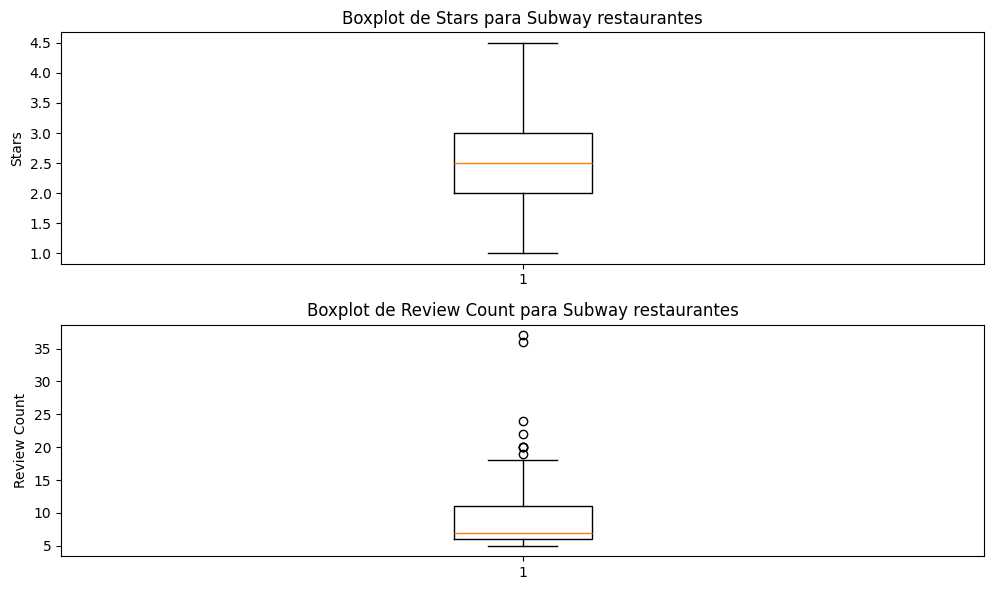

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_rest_data["stars"])
plt.title("Boxplot de Stars para Subway restaurantes")
plt.ylabel("Stars")

plt.subplot(2, 1, 2)
plt.boxplot(subway_rest_data["review_count"])
plt.title("Boxplot de Review Count para Subway restaurantes")
plt.ylabel("Review Count")

plt.tight_layout()
plt.show()

In [ ]:
df_yelp_restaurantes[
    (df_yelp_restaurantes["name"] == "Subway")
    & (df_yelp_restaurantes["review_count"] > 15)
]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
13826,d-hMYlJ-hMAHSgd3KvYcWg,Subway,465 E Plumb Ln,Reno,FL,89511,39.506015,-119.797213,2.5,24,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Food Delivery Services, Restaurants, Delis, Sa...","{'Friday': '9:0-21:30', 'Monday': '9:0-21:30',..."
13894,EwblShAzTJ4Op6aJZYYuVA,Subway,"1641 S Jefferson Ave, Ste E",St. Louis,PA,63104,38.615624,-90.221256,2.5,16,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Sandwiches, Restaurants, Fast Food","{'Friday': '9:0-21:0', 'Monday': '0:0-0:0', 'S..."
23139,CyctXClhoy8YamJjcE2ifg,Subway,5530 Telegraph Rd,St Louis,FL,63129,38.471225,-90.304188,1.5,22,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '10:30-19:0', 'Monday': '10:30-19:0..."
40209,lF7Zn9GNg0wMpM5g5kWdBw,Subway,5015 S Mccarran Blvd,Reno,CA,89502,39.477285,-119.783929,2.5,36,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Sandwiches, Fast Food, Restaurants","{'Friday': '7:0-17:0', 'Monday': '0:0-0:0', 'S..."
40714,3p1gTXaVUKprXnzvhq7RRA,Subway,"5055 Sun Valley Blvd, Ste 300",Sun Valley,FL,89433,39.576861,-119.781463,2.0,19,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Restaurants, Sandwiches","{'Friday': '10:0-21:0', 'Monday': '10:0-20:30'..."
42625,An_QUi1YfPUf5kXJEgZMeQ,Subway,"5480 E Speedway Blvd, Ste C102",Tucson,FL,85712,32.235828,-110.875841,3.0,18,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '7:0-18:0', 'Monday': '0:0-0:0', 'S..."
47599,mwRqQENSKmBIGZEfWRzX5g,Subway,"6688 Nolensville Pike Rd, Ste 212",Brentwood,FL,37027,36.000563,-86.692133,1.5,20,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Fast Food, Sandwiches","{'Friday': '9:0-21:0', 'Monday': '0:0-0:0', 'S..."
53630,9_DJMSzn5PtMit78KFrwaw,Subway,237 N Peters,New Orleans,PA,70130,29.953171,-90.065352,2.5,18,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '9:0-18:30', 'Monday': '9:0-18:30',..."
66109,7e4PHzKqvtxcbxcXy6Jn3g,Subway,1151 S Kingshighway Blvd,St Louis,PA,63110,38.627035,-90.265107,2.5,20,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Sandwiches, Fast Food","{'Friday': '10:0-20:0', 'Monday': '10:0-20:0',..."
75582,2qg67Mq6cKjl1GPbls32Dg,Subway,"1131 Steamboat Pkwy, Ste 800",Reno,FL,89521,39.423295,-119.738617,3.0,37,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '10:0-19:0', 'Monday': '10:0-19:0',..."


Eliminacion de etiquetas de categoría obsoletos


In [ ]:
categorias = df_yelp_restaurantes["categories"].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {
    categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)
}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:167]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")

Las menos repetidas son:
Advertising: 2 veces
Rafting/Kayaking: 2 veces
Office Cleaning: 2 veces
Waxing: 2 veces
Body Shops: 2 veces
Hardware Stores: 2 veces
Playgrounds: 2 veces
Adult Education: 2 veces
Leisure Centers: 2 veces
Web Design: 2 veces
Wine Tours: 2 veces
Auto Glass Services: 2 veces
Interior Design: 2 veces
Honey: 2 veces
Gun/Rifle Ranges: 2 veces
Paint & Sip: 2 veces
Dry Cleaning & Laundry: 2 veces
Pool & Billiards: 2 veces
Motorcycle Dealers: 2 veces
Tableware: 2 veces
Sports Wear: 2 veces
Building Supplies: 2 veces
Bike Repair/Maintenance: 2 veces
Banks & Credit Unions: 2 veces
Team Building Activities: 2 veces
Pet Sitting: 2 veces
Tattoo: 2 veces
Hunting & Fishing Supplies: 2 veces
Home Organization: 2 veces
Traditional Chinese Medicine: 2 veces
Country Dance Halls: 2 veces
Shaved Snow: 2 veces
Junk Removal & Hauling: 2 veces
Mass Media: 2 veces
Laundry Services: 2 veces
Airports: 2 veces
Children's Clothing: 2 veces
IT Services & Computer Repair: 2 veces
Pest Control

In [ ]:
categorias = df_yelp_restaurantes["categories"].str.split(", ").explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[
    frecuencia_categorias == 1
].index.tolist()


def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(", ")
    categorias_filtradas = [
        categoria
        for categoria in categorias_lista
        if categoria not in categorias_solo_una_vez
    ]
    return ", ".join(categorias_filtradas)


df_yelp_restaurantes["categories"] = df_yelp_restaurantes["categories"].apply(
    filtrar_categorias
)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_restaurantes.head()

DataFrame modificado eliminando las categorías que se repiten solo una vez:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,False,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Food, Delis, Italian, Bakeries, Restaurants","{'Friday': '10:0-20:0', 'Monday': '10:0-18:0',..."
22,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,PA,46250,39.904320,-86.053080,4.0,20,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Steakhouses, Asian Fusion, Restaurants","{'Friday': '11:0-21:0', 'Monday': '11:0-21:0',..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,False,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Friday': '12:0-2:0', 'Monday': '16:0-0:0', '..."
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pizza, Chicken Wings, Sandwiches, Restaurants","{'Friday': '10:0-1:0', 'Monday': '10:0-0:0', '..."


Repetimos una vez mas el procedimiento pero esta vez con **_df_yelp_tips_**


In [ ]:
subway_data_tips = df_yelp_tips[df_yelp_tips["name"] == "Subway"]

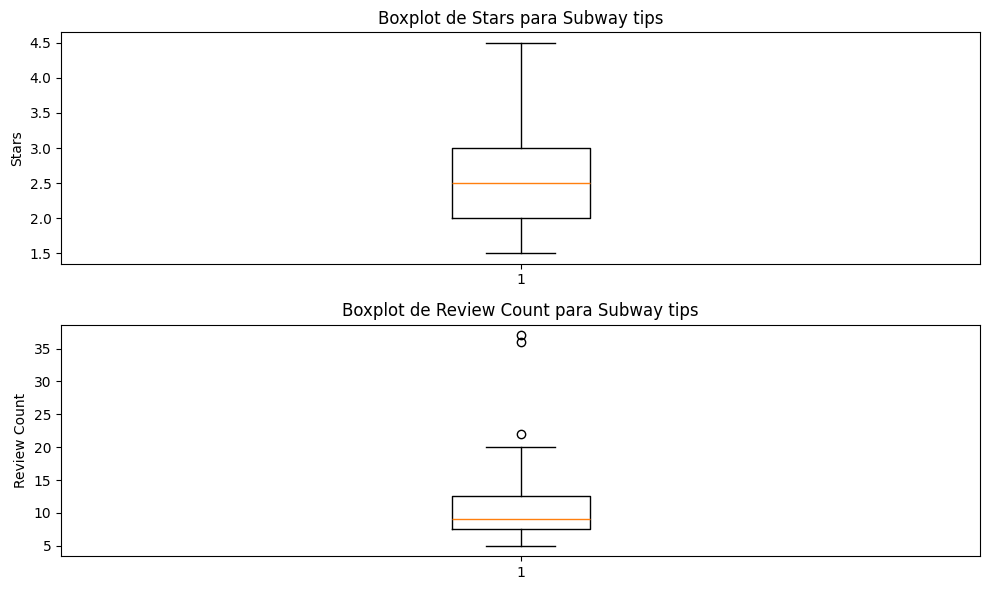

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_data_tips["stars"])
plt.title("Boxplot de Stars para Subway tips")
plt.ylabel("Stars")

plt.subplot(2, 1, 2)
plt.boxplot(subway_data_tips["review_count"])
plt.title("Boxplot de Review Count para Subway tips")
plt.ylabel("Review Count")

plt.tight_layout()
plt.show()

In [ ]:
df_yelp_tips[(df_yelp_tips["name"] == "Subway") & (df_yelp_tips["review_count"] > 20)]

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
52635,orB78QDImDsusooQud9hFw,2qg67Mq6cKjl1GPbls32Dg,Wow! Such amazing customer service. Great job ...,2019-09-05 20:12:50,0,Subway,"1131 Steamboat Pkwy, Ste 800",Reno,FL,89521,39.423295,-119.738617,3.0,37,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '10:0-19:0', 'Monday': '10:0-19:0',..."
59529,xHVwBmvuBEbmV0c4NU2Hwg,CyctXClhoy8YamJjcE2ifg,The old owner was horrible. The new owner is a...,2018-09-16 17:42:52,0,Subway,5530 Telegraph Rd,St Louis,FL,63129,38.471225,-90.304188,1.5,22,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '10:30-19:0', 'Monday': '10:30-19:0..."
63459,HT6tAhRKfcrqRb9T118HEA,lF7Zn9GNg0wMpM5g5kWdBw,Long line...went very fast! All were friendly!,2017-04-26 19:18:47,0,Subway,5015 S Mccarran Blvd,Reno,CA,89502,39.477285,-119.783929,2.5,36,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Sandwiches, Fast Food, Restaurants","{'Friday': '7:0-17:0', 'Monday': '0:0-0:0', 'S..."


Una vez mas, repetimos el proceso en las categorías


In [ ]:
categorias = df_yelp_tips["categories"].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {
    categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)
}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:44]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")

Las menos repetidas son:
Brewing Supplies: 2 veces
Advertising: 2 veces
Kids Hair Salons: 2 veces
Lawyers: 2 veces
Office Cleaning: 2 veces
Mobile Phone Repair: 2 veces
Eyebrow Services: 2 veces
Laser Tag: 2 veces
Landscaping: 2 veces
Homeowner Association: 2 veces
Recording & Rehearsal Studios: 2 veces
Propane: 2 veces
Auto Glass Services: 2 veces
Nail Salons: 2 veces
Auto Repair: 2 veces
Dietitians: 2 veces
Mobile Phones: 2 veces
Music Production Services: 2 veces
Ice Delivery: 2 veces
Hostels: 2 veces
Home Cleaning: 2 veces
Chiropractors: 2 veces
Sports Clubs: 2 veces
Art Museums: 2 veces
Weight Loss Centers: 2 veces
Fuzhou: 2 veces
IT Services & Computer Repair: 2 veces
Guest Houses: 2 veces
Car Wash: 2 veces
LAN Centers: 2 veces
Amateur Sports Teams: 2 veces
Golf Equipment: 2 veces
Senegalese: 2 veces
Threading Services: 2 veces
Outdoor Furniture Stores: 2 veces
Shoe Stores: 2 veces
Electronics: 2 veces
Plumbing: 2 veces
Egyptian: 2 veces
Antiques: 3 veces
Tasting Classes: 3 veces

In [ ]:
categorias = df_yelp_tips["categories"].str.split(", ").explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[
    frecuencia_categorias == 1
].index.tolist()


def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(", ")
    categorias_filtradas = [
        categoria
        for categoria in categorias_lista
        if categoria not in categorias_solo_una_vez
    ]
    return ", ".join(categorias_filtradas)


df_yelp_tips["categories"] = df_yelp_tips["categories"].apply(filtrar_categorias)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_tips.head()

DataFrame modificado eliminando las categorías que se repiten solo una vez:


,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1viszljzsa8W7VnYPuWosw,Zg83olSjsdXAhE5EEy5IcQ,Order crispy and they bake it up good.,2018-04-01 01:40:12,0,Oregano's,100 W Orange Grove Rd,Tucson,PA,85704,32.323157,-110.973652,3.5,385,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Italian, Pizza","{'Friday': '11:0-22:0', 'Monday': '0:0-0:0', '..."
1,YnlCpuaBa3qWBp4te8pGmA,XIKYdKWq72zUYsq8NBxcCQ,The honey glazed salmon is amazing!,2018-01-14 15:00:01,0,Aksum Cafe,4630 Baltimore Ave,Philadelphia,PA,19143,39.948547,-75.216366,4.0,393,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Mediterranean, Vegetarian, American (New), Res...","{'Friday': '16:0-21:0', 'Monday': '0:0-0:0', '..."
2,IE0f4Mt6rfEw26pn598doA,aPD0HkuA7MXNhZZqXiGF4g,Great fish and chips!!,2017-09-30 22:39:11,0,McCreary's Irish Pub and Eatery,414 Main St,Franklin,PA,37064,35.924479,-86.870951,3.5,146,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pubs, Bars, Irish Pub, Irish, American (New), ...","{'Friday': '11:0-23:0', 'Monday': '11:0-22:0',..."
3,BrobnxoTkPml180NhXl6kw,zjLT8ELDYxxknQ9ZLrl6_w,Call ahead of time to make sure there isn't a ...,2017-03-18 18:22:28,0,Brunchery Restaurant & Catering,"3225 S MacDill Ave, Ste 109",Tampa,PA,33629,27.915901,-82.494764,3.5,274,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Caterers, Sandwiches, Burgers, Ev...","{'Friday': '7:0-14:0', 'Monday': '7:0-14:0', '..."
4,9XhCRgu_v7y-X2v4Av3HPA,fgnHM4VT-n1VjFL3YeBJsg,Ordered the pad Thai shrimp and it was good!,2017-08-29 17:12:23,0,Royal Thai Bistreaux,"1299 Hickory Ave, Ste A",Harahan,PA,70123,29.956544,-90.202459,4.5,171,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Thai, Restaurants","{'Friday': '16:30-21:30', 'Monday': None, 'Sat..."


A continuacion se revisará y corregirá en caso de ser necesario el tipo de dato de cada columna


In [ ]:
df_yelp_users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,14


In [ ]:
df_yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99015 entries, 0 to 99014
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             99015 non-null  object        
 1   name                99015 non-null  object        
 2   review_count        99015 non-null  int64         
 3   yelping_since       99015 non-null  datetime64[ns]
 4   useful              99015 non-null  int64         
 5   funny               99015 non-null  int64         
 6   cool                99015 non-null  int64         
 7   elite               99015 non-null  object        
 8   friends             99015 non-null  object        
 9   fans                99015 non-null  int64         
 10  average_stars       99015 non-null  float64       
 11  compliment_hot      99015 non-null  int64         
 12  compliment_more     99015 non-null  int64         
 13  compliment_profile  99015 non-null  int64     

In [ ]:
df_yelp_checkin.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."


In [ ]:
df_yelp_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   3330 non-null   object 
 1   name          3330 non-null   object 
 2   address       3330 non-null   object 
 3   city          3330 non-null   object 
 4   state         3330 non-null   object 
 5   postal_code   3330 non-null   object 
 6   latitude      3330 non-null   float64
 7   longitude     3330 non-null   float64
 8   stars         3330 non-null   float64
 9   review_count  3330 non-null   int64  
 10  is_open       3330 non-null   bool   
 11  attributes    3296 non-null   object 
 12  categories    3330 non-null   object 
 13  hours         3082 non-null   object 
 14  date          3330 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 367.6+ KB


In [ ]:
df_yelp_restaurantes.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."


In [ ]:
df_yelp_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22685 entries, 3 to 150339
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   22685 non-null  object 
 1   name          22685 non-null  object 
 2   address       22685 non-null  object 
 3   city          22685 non-null  object 
 4   state         22685 non-null  object 
 5   postal_code   22685 non-null  object 
 6   latitude      22685 non-null  float64
 7   longitude     22685 non-null  float64
 8   stars         22685 non-null  float64
 9   review_count  22685 non-null  int64  
 10  is_open       22685 non-null  bool   
 11  attributes    22429 non-null  object 
 12  categories    22685 non-null  object 
 13  hours         19504 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 2.4+ MB


In [ ]:
df_yelp_tips.head(1)

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1viszljzsa8W7VnYPuWosw,Zg83olSjsdXAhE5EEy5IcQ,Order crispy and they bake it up good.,2018-04-01 01:40:12,0,Oregano's,100 W Orange Grove Rd,Tucson,PA,85704,32.323157,-110.973652,3.5,385,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Italian, Pizza","{'Friday': '11:0-22:0', 'Monday': '0:0-0:0', '..."


In [ ]:
df_yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69346 entries, 0 to 69345
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           69346 non-null  object 
 1   business_id       69346 non-null  object 
 2   text              69346 non-null  object 
 3   date              69346 non-null  object 
 4   compliment_count  69346 non-null  int64  
 5   name              69346 non-null  object 
 6   address           69346 non-null  object 
 7   city              69346 non-null  object 
 8   state             69346 non-null  object 
 9   postal_code       69346 non-null  object 
 10  latitude          69346 non-null  float64
 11  longitude         69346 non-null  float64
 12  stars             69346 non-null  float64
 13  review_count      69346 non-null  int64  
 14  is_open           69346 non-null  bool   
 15  attributes        69301 non-null  object 
 16  categories        69346 non-null  object

In [ ]:
df_yelp_reviews.head(3)

,review_id,user_id,business_id,stars,funny,cool,text,date
0,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,0,1,I was really between 3 and 4 stars for this on...,2018-07-17
2,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5,0,1,Great staff always helps and always nice. Alwa...,2017-05-26


In [ ]:
df_yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558655 entries, 0 to 558654
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    558655 non-null  object
 1   user_id      558655 non-null  object
 2   business_id  558655 non-null  object
 3   stars        558655 non-null  int8  
 4   funny        558655 non-null  int8  
 5   cool         558655 non-null  int8  
 6   text         558655 non-null  object
 7   date         558655 non-null  object
dtypes: int8(3), object(5)
memory usage: 22.9+ MB


Los formatos se encuentran en su mayoria en el estado correcto, se harán los siguientes cambios

- ### df_yelp_checkin, df_yelp_restaurantes df_yelp_tips:
  Se cambia el formato de la columna _is_open_ de Entero a Booleano puesto sus datos eran 1 y 0
- ### df_yelp_users, df_yelp_reviews:
  En las columnas _yelping_since_ (referencia a la fecha de creción del usuario) y _date_ (referencia de la fecha de posteo de la reseña) se les quita la hora puesto que es un dato obsoleto y se cambia su formato a Datetime


In [ ]:
df_yelp_checkin["is_open"] = df_yelp_checkin["is_open"].astype(bool)
df_yelp_restaurantes["is_open"] = df_yelp_restaurantes["is_open"].astype(bool)
df_yelp_tips["is_open"] = df_yelp_tips["is_open"].astype(bool)

In [ ]:
df_yelp_users["yelping_since"] = pd.to_datetime(df_yelp_users["yelping_since"])
df_yelp_reviews["date"] = pd.to_datetime(df_yelp_reviews["date"])
df_yelp_reviews["date"] = df_yelp_reviews["date"].dt.date

In [ ]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212014 entries, 0 to 212013
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              212014 non-null  object 
 1   address           210956 non-null  object 
 2   gmap_id           212014 non-null  object 
 3   description       72392 non-null   object 
 4   latitude          212014 non-null  float64
 5   longitude         212014 non-null  float64
 6   category          212014 non-null  object 
 7   avg_rating        212014 non-null  float64
 8   num_of_reviews    212014 non-null  int64  
 9   price             100000 non-null  object 
 10  hours             189913 non-null  object 
 11  MISC              210599 non-null  object 
 12  state             190751 non-null  object 
 13  relative_results  170957 non-null  object 
 14  url               212014 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 24.3+ MB


In [ ]:
df_maps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393452 entries, 0 to 2393451
Data columns (total 30 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_id           object        
 1   name_x            object        
 2   time              int64         
 3   rating            int64         
 4   text              object        
 5   pics              object        
 6   resp              object        
 7   gmap_id           object        
 8   anio              int64         
 9   estado            object        
 10  name_y            object        
 11  address           object        
 12  description       object        
 13  latitude          float64       
 14  longitude         float64       
 15  category          object        
 16  avg_rating        float64       
 17  num_of_reviews    int64         
 18  price             object        
 19  hours             object        
 20  MISC              object        
 21  state   

In [ ]:
df_yelp_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22685 entries, 3 to 150339
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   22685 non-null  object 
 1   name          22685 non-null  object 
 2   address       22685 non-null  object 
 3   city          22685 non-null  object 
 4   state         22685 non-null  object 
 5   postal_code   22685 non-null  object 
 6   latitude      22685 non-null  float64
 7   longitude     22685 non-null  float64
 8   stars         22685 non-null  float64
 9   review_count  22685 non-null  int64  
 10  is_open       22685 non-null  bool   
 11  attributes    22429 non-null  object 
 12  categories    22685 non-null  object 
 13  hours         19504 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 2.4+ MB


In [ ]:
df_yelp_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   3330 non-null   object 
 1   name          3330 non-null   object 
 2   address       3330 non-null   object 
 3   city          3330 non-null   object 
 4   state         3330 non-null   object 
 5   postal_code   3330 non-null   object 
 6   latitude      3330 non-null   float64
 7   longitude     3330 non-null   float64
 8   stars         3330 non-null   float64
 9   review_count  3330 non-null   int64  
 10  is_open       3330 non-null   bool   
 11  attributes    3296 non-null   object 
 12  categories    3330 non-null   object 
 13  hours         3082 non-null   object 
 14  date          3330 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 367.6+ KB


In [ ]:
df_yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69346 entries, 0 to 69345
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           69346 non-null  object 
 1   business_id       69346 non-null  object 
 2   text              69346 non-null  object 
 3   date              69346 non-null  object 
 4   compliment_count  69346 non-null  int64  
 5   name              69346 non-null  object 
 6   address           69346 non-null  object 
 7   city              69346 non-null  object 
 8   state             69346 non-null  object 
 9   postal_code       69346 non-null  object 
 10  latitude          69346 non-null  float64
 11  longitude         69346 non-null  float64
 12  stars             69346 non-null  float64
 13  review_count      69346 non-null  int64  
 14  is_open           69346 non-null  bool   
 15  attributes        69301 non-null  object 
 16  categories        69346 non-null  object

In [ ]:
df_yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558655 entries, 0 to 558654
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    558655 non-null  object
 1   user_id      558655 non-null  object
 2   business_id  558655 non-null  object
 3   stars        558655 non-null  int8  
 4   funny        558655 non-null  int8  
 5   cool         558655 non-null  int8  
 6   text         558655 non-null  object
 7   date         558655 non-null  object
dtypes: int8(3), object(5)
memory usage: 22.9+ MB


In [ ]:
df_yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99015 entries, 0 to 99014
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             99015 non-null  object        
 1   name                99015 non-null  object        
 2   review_count        99015 non-null  int64         
 3   yelping_since       99015 non-null  datetime64[ns]
 4   useful              99015 non-null  int64         
 5   funny               99015 non-null  int64         
 6   cool                99015 non-null  int64         
 7   elite               99015 non-null  object        
 8   friends             99015 non-null  object        
 9   fans                99015 non-null  int64         
 10  average_stars       99015 non-null  float64       
 11  compliment_hot      99015 non-null  int64         
 12  compliment_more     99015 non-null  int64         
 13  compliment_profile  99015 non-null  int64     

# Subway


In [ ]:
# Utiliza str.contains() con una expresión regular para buscar nombres parecidos a "Subway"
df_maps_records_restaurantes = df_maps_restaurantes[df_maps_restaurantes['name'].str.contains(r'Subway', case=False)]

# Calcula el número de registros de Subway en restaurantes
count_subway_records_restaurantes = df_maps_records_restaurantes.shape[0]

# Imprime el número de registros de Subway en restaurantes
print("Número de registros de Subway en restaurantes:", count_subway_records_restaurantes)

Número de registros de Subway en restaurantes: 9489


In [ ]:
df_maps_records_reviews = df_maps_reviews[df_maps_reviews['gmap_id'].isin(df_maps_records_restaurantes['gmap_id'].tolist())]

# Calcula el número de registros de Subway en reviews
count_subway_records_reviews = df_maps_records_reviews.shape[0]

# Imprime el número de registros de Subway en reviews
print("Número de registros de Subway en reviews:", count_subway_records_reviews)

Número de registros de Subway en reviews: 41554


In [ ]:
df_maps_restaurantes = df_maps_records_restaurantes
df_maps_reviews = df_maps_records_reviews

# Outlieers

## df_maps_restaurantes

In [ ]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9489 entries, 124 to 212005
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              9489 non-null   object 
 1   address           9489 non-null   object 
 2   gmap_id           9489 non-null   object 
 3   description       9427 non-null   object 
 4   latitude          9489 non-null   float64
 5   longitude         9489 non-null   float64
 6   category          9489 non-null   object 
 7   avg_rating        9489 non-null   float64
 8   num_of_reviews    9489 non-null   int64  
 9   price             9430 non-null   object 
 10  hours             9369 non-null   object 
 11  MISC              9489 non-null   object 
 12  state             9369 non-null   object 
 13  relative_results  9034 non-null   object 
 14  url               9489 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.2+ MB


### `avg_rating`

Comprobamos que no haya datos fuera del rango (1:5)

In [ ]:
df_maps_restaurantes['avg_rating'].value_counts()

avg_rating
4.0    1029
3.9    1006
4.1     942
3.8     925
3.7     780
4.2     752
3.6     631
4.3     556
3.5     479
3.4     425
3.3     344
4.4     268
3.2     223
3.1     191
3.0     172
4.5     115
2.9     104
2.8      96
2.7      75
2.6      63
4.6      56
2.5      47
2.4      34
2.3      30
2.0      24
4.7      22
4.8      16
5.0      16
2.2      16
1.8      11
2.1      11
1.0       9
4.9       5
1.6       4
1.9       4
1.3       3
1.7       3
1.5       2
Name: count, dtype: int64

### ``num_of_reviews``

Observamos la distribución de la columna `num_of_reviews`

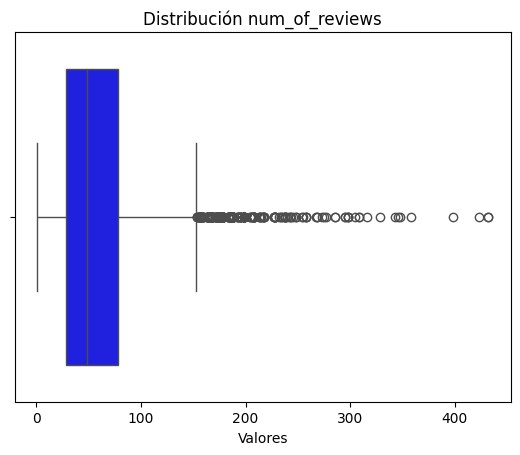

In [ ]:
# Crear el gráfico de caja
sns.boxplot(x=df_maps_restaurantes['num_of_reviews'], color='blue')

# Añadir etiquetas y título
plt.xlabel('Valores')
plt.title('Distribución num_of_reviews')

# Mostrar el gráfico
plt.show()

Y decidimos eliminar datos que no sean representativos, siendo estos aquellos que posean mas de 160. Recortando asi un 3% `256` de los datos que poseiamos `9489`

In [ ]:
df_maps_restaurantes.drop(df_maps_restaurantes[df_maps_restaurantes['num_of_reviews'] > 160].index, inplace=True) # saco 256 registros de 9489 equivale al 3%

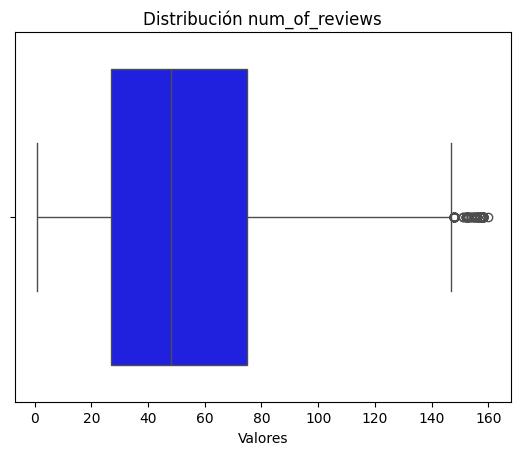

In [ ]:
# Crear el gráfico de caja
sns.boxplot(x=df_maps_restaurantes['num_of_reviews'], color='blue')

# Añadir etiquetas y título
plt.xlabel('Valores')
plt.title('Distribución num_of_reviews')

# Mostrar el gráfico
plt.show()

### ``latitude`` y ``longitude``

Graficamos los datos en un mapa de USA en busca de registros con coordenadas atipicas

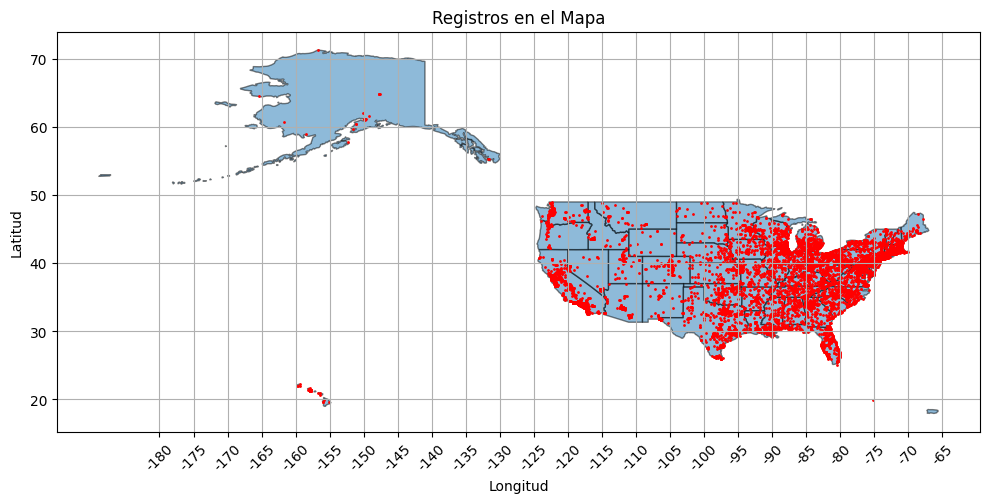

In [ ]:
# Cargar los datos geoespaciales del mapa GeoJSON
usa_geojson = 'Geojson/us-states.json'
usa_gpd = gpd.read_file(usa_geojson)

# Crear un GeoDataFrame con los registros de tus datos
registros_gdf = gpd.GeoDataFrame(df_maps_restaurantes, geometry=gpd.points_from_xy(df_maps_restaurantes['longitude'], df_maps_restaurantes['latitude']))

# Crear el subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotear los barrios en el mapa
usa_gpd.plot(ax=ax, edgecolor='black', alpha=0.5)

# Plotear los registros en el mapa
registros_gdf.plot(ax=ax, color='red', markersize=1)

# Ajustar diseño
plt.title('Registros en el Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Agregar líneas de división y más valores en el eje horizontal (longitud)
ax.set_xticks(range(-180, -60, 5))  # Establece las marcas en intervalos de 5 grados
ax.set_xticklabels(range(-180, -60, 5), rotation=45)  # Etiquetas rotadas para una mejor legibilidad

# Agregar líneas de división en los ejes x e y
ax.grid(True)

plt.tight_layout()

# Mostrar el mapa
plt.show()

In [ ]:
df_maps_restaurantes.loc[(df_maps_restaurantes['latitude'] < 21) & (df_maps_restaurantes['longitude'] < -70) & (df_maps_restaurantes['longitude'] > -80)]

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
139328,Subway,"Subway, Sherman Ave",0x8ececf93aaa3553b:0x80d37fdf4ff72429,Casual counter-serve chain for build-your-own ...,19.916014,-75.139875,"[Sandwich shop, Restaurant]",4.0,55,$,"[[Monday, 6AM–10PM], [Tuesday, 6AM–10PM], [Wed...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 6AM,"[0x8ececfc0e847f4b1:0x3032c5de29d5e2b, 0x8ecec...",https://www.google.com/maps/place//data=!4m2!3...


Buscando en google la direccion me devuelve las correctas coordenadas del local

In [ ]:
df_maps_restaurantes.loc[df_maps_restaurantes['gmap_id'] == "0x8ececf93aaa3553b:0x80d37fdf4ff72429", 'latitude'] = 43.127694
df_maps_restaurantes.loc[df_maps_restaurantes['gmap_id'] == "0x8ececf93aaa3553b:0x80d37fdf4ff72429", 'longitude'] = -89.363469

## Cruze de tablas

Filtramos las reviews dejando solo las que pertenecen a los locales que quedaron luego del tratamiento de outliers

In [ ]:
restaurantes = df_maps_restaurantes['gmap_id'].to_list()
df_maps_reviews = df_maps_reviews[df_maps_reviews['gmap_id'].isin(restaurantes)]
df_maps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39240 entries, 226 to 2389575
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           39240 non-null  object        
 1   name_x            39240 non-null  object        
 2   time              39240 non-null  int64         
 3   rating            39240 non-null  int64         
 4   text              18995 non-null  object        
 5   pics              461 non-null    object        
 6   resp              105 non-null    object        
 7   gmap_id           39240 non-null  object        
 8   anio              39240 non-null  int64         
 9   estado            39240 non-null  object        
 10  name_y            39240 non-null  object        
 11  address           39240 non-null  object        
 12  description       39210 non-null  object        
 13  latitude          39240 non-null  float64       
 14  longitude         39240

## df_maps_reviews

In [ ]:
df_maps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39240 entries, 226 to 2389575
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           39240 non-null  object        
 1   name_x            39240 non-null  object        
 2   time              39240 non-null  int64         
 3   rating            39240 non-null  int64         
 4   text              18995 non-null  object        
 5   pics              461 non-null    object        
 6   resp              105 non-null    object        
 7   gmap_id           39240 non-null  object        
 8   anio              39240 non-null  int64         
 9   estado            39240 non-null  object        
 10  name_y            39240 non-null  object        
 11  address           39240 non-null  object        
 12  description       39210 non-null  object        
 13  latitude          39240 non-null  float64       
 14  longitude         39240

### `avg_rating`

Comprobamos que no haya datos fuera del rango (1:5)

In [ ]:
df_maps_reviews['avg_rating'].value_counts()

avg_rating
3.9    5191
4.0    4599
4.2    4099
3.8    3904
4.1    3898
3.7    3087
3.6    2912
4.3    2422
3.5    2136
3.4    1637
3.3    1227
4.4    1197
3.2     780
3.1     433
3.0     364
4.6     215
2.8     210
4.5     197
2.9     180
2.7     174
2.6     111
2.5      80
2.3      55
4.7      49
2.4      37
2.0      15
2.2      11
1.8      10
4.9      10
Name: count, dtype: int64

### ``num_of_reviews``

Observamos la distribución de la columna `num_of_reviews`

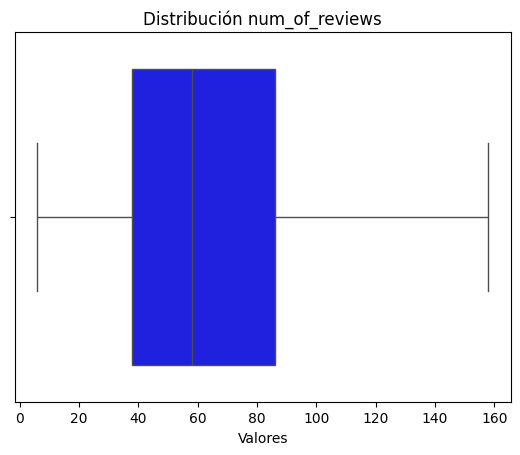

In [ ]:
# Crear el gráfico de caja
sns.boxplot(x=df_maps_reviews['num_of_reviews'], color='blue')

# Añadir etiquetas y título
plt.xlabel('Valores')
plt.title('Distribución num_of_reviews')

# Mostrar el gráfico
plt.show()

Y decidimos eliminar datos que no sean representativos, siendo estos aquellos que posean mas de 160. Recortando asi un 3% `256` de los datos que poseiamos `9489`

In [ ]:
df_maps_restaurantes.drop(df_maps_restaurantes[df_maps_restaurantes['num_of_reviews'] > 160].index, inplace=True) # saco 256 registros de 9489 equivale al 3%

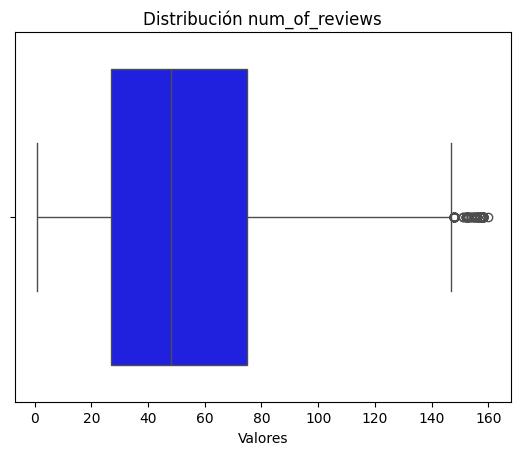

In [ ]:
# Crear el gráfico de caja
sns.boxplot(x=df_maps_restaurantes['num_of_reviews'], color='blue')

# Añadir etiquetas y título
plt.xlabel('Valores')
plt.title('Distribución num_of_reviews')

# Mostrar el gráfico
plt.show()

### ``latitude`` y ``longitude``

Graficamos los datos en un mapa de USA en busca de registros con coordenadas atipicas

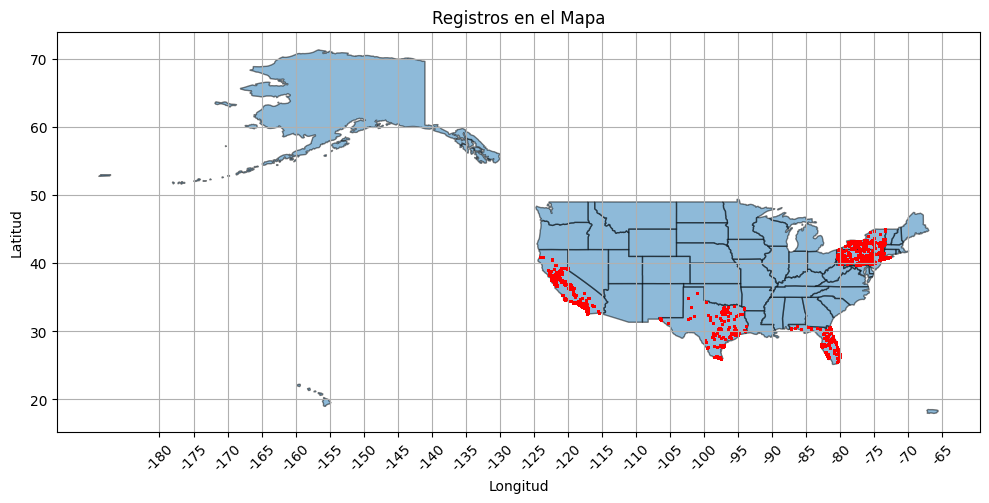

In [ ]:
# Cargar los datos geoespaciales del mapa GeoJSON
usa_geojson = 'Geojson/us-states.json'
usa_gpd = gpd.read_file(usa_geojson)

# Crear un GeoDataFrame con los registros de tus datos
registros_gdf = gpd.GeoDataFrame(df_maps_reviews, geometry=gpd.points_from_xy(df_maps_reviews['longitude'], df_maps_reviews['latitude']))

# Crear el subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotear los barrios en el mapa
usa_gpd.plot(ax=ax, edgecolor='black', alpha=0.5)

# Plotear los registros en el mapa
registros_gdf.plot(ax=ax, color='red', markersize=1)

# Ajustar diseño
plt.title('Registros en el Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Agregar líneas de división y más valores en el eje horizontal (longitud)
ax.set_xticks(range(-180, -60, 5))  # Establece las marcas en intervalos de 5 grados
ax.set_xticklabels(range(-180, -60, 5), rotation=45)  # Etiquetas rotadas para una mejor legibilidad

# Agregar líneas de división en los ejes x e y
ax.grid(True)

plt.tight_layout()

# Mostrar el mapa
plt.show()

# Tipos de datos

## df_maps_restaurantes

In [ ]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9234 entries, 124 to 212005
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              9234 non-null   object 
 1   address           9234 non-null   object 
 2   gmap_id           9234 non-null   object 
 3   description       9173 non-null   object 
 4   latitude          9234 non-null   float64
 5   longitude         9234 non-null   float64
 6   category          9234 non-null   object 
 7   avg_rating        9234 non-null   float64
 8   num_of_reviews    9234 non-null   int64  
 9   price             9175 non-null   object 
 10  hours             9114 non-null   object 
 11  MISC              9234 non-null   object 
 12  state             9114 non-null   object 
 13  relative_results  8779 non-null   object 
 14  url               9234 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


Cambiamos el tipo de datos de las columnas `avg_rating`, `num_of_reviews` y `price` para reducir el uso de memoria a cambio de precisiòn innecesaria en los datos

In [ ]:
df_maps_restaurantes['avg_rating'] = df_maps_restaurantes['avg_rating'].astype('float32')

df_maps_restaurantes['num_of_reviews'] = df_maps_restaurantes['num_of_reviews'].astype('int32')

df_maps_restaurantes['price'] = df_maps_restaurantes['price'].astype('category')

## df_maps_reviews

In [ ]:
print(df_maps_reviews.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39240 entries, 226 to 2389575
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           39240 non-null  object        
 1   name_x            39240 non-null  object        
 2   time              39240 non-null  int64         
 3   rating            39240 non-null  int64         
 4   text              18995 non-null  object        
 5   pics              461 non-null    object        
 6   resp              105 non-null    object        
 7   gmap_id           39240 non-null  object        
 8   anio              39240 non-null  int64         
 9   estado            39240 non-null  object        
 10  name_y            39240 non-null  object        
 11  address           39240 non-null  object        
 12  description       39210 non-null  object        
 13  latitude          39240 non-null  float64       
 14  longitude         39240

Cambiamos el tipo de datos de las columnas para reducir el uso de memoria.

In [ ]:
# Convertir 'rating' a int8
df_maps_reviews_copy = df_maps_reviews.copy()
df_maps_reviews_copy['rating'] = df_maps_reviews_copy['rating'].astype('int8')

# Convertir 'num_of_reviews' a int32
df_maps_reviews_copy['num_of_reviews'] = df_maps_reviews_copy['num_of_reviews'].astype('int32')

# Convertir 'price' a category
df_maps_reviews_copy['price'] = df_maps_reviews_copy['price'].astype('category')

# Convertir 'anio' a category
df_maps_reviews_copy['anio'] = df_maps_reviews_copy['anio'].astype('category')

# Convertir 'estado' a category
df_maps_reviews_copy['estado'] = df_maps_reviews_copy['estado'].astype('category')

# Convertir 'avg_rating' a float32
df_maps_reviews_copy['avg_rating'] = df_maps_reviews_copy['avg_rating'].astype('float32')

# Convertir 'state_ab' a category
df_maps_reviews_copy['state_ab'] = df_maps_reviews_copy['state_ab'].astype('category')

# Convertir 'us_state' a category
df_maps_reviews_copy['us_state'] = df_maps_reviews_copy['us_state'].astype('category')

# Asignar la copia modificada al DataFrame original
df_maps_reviews = df_maps_reviews_copy

### Subway
es la empresa con la que trabajaremos, empezaremos por ver cuantos registros hay en cada Dataframe


In [ ]:
subway_records_rest = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == 'Subway']
count_subway_records_rest = subway_records_rest.shape[0] 
print("Número de registros de Subway en restaurantes:", count_subway_records_rest)

Número de registros de Subway en restaurantes: 227


In [ ]:
subway_records_checkin = df_yelp_checkin.loc[df_yelp_checkin['name'] == 'Subway']
count_subway_records_checkin = subway_records_checkin.shape[0] 
print("Número de registros de Subway en checkin:", count_subway_records_checkin)

Número de registros de Subway en checkin: 7


In [ ]:
subway_records_tips = df_yelp_tips.loc[df_yelp_tips['name'] == 'Subway']
count_subway_records_tips = subway_records_tips.shape[0] 
print("Número de registros de Subway tips:", count_subway_records_tips)

Número de registros de Subway tips: 79


Para revisar el dataframe de reviews y el de usuarios, deberemos obtener el Business_id y usarlo de guía

Para eso, crearemos una lista que contenga todos los business_id que correspondan a locales de Subway, luego crearemos un dataframe que contenga todas las reviews de subway y uno que contenga todos los usuarios que realizaron reviews

In [ ]:
(df_yelp_restaurantes.loc[df_yelp_restaurantes['name']== 'Subway']).head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
964,vuL3QCjFZ7lU5LMdUAmZ9Q,Subway,383 W Lancaster Ave,Wayne,FL,19087,40.044263,-75.399354,1.5,5,False,None,"Sandwiches, Fast Food, Restaurants",None


In [ ]:
subway_business_ids = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == 'Subway', 'business_id'].tolist()
len(subway_business_ids)

227

In [ ]:
reviews_yelp_subway = df_yelp_reviews[df_yelp_reviews['business_id'].isin(subway_business_ids)]
reviews_yelp_subway

,review_id,user_id,business_id,stars,funny,cool,text,date
598,CEHaucuAzqSzOdMB3mPNTA,jsej79maZJg_X619aw8dig,1QtF1bFgzG3Jo0-L4kv0Cg,2,0,0,This place was slow and didn't have any deals ...,2017-10-24
6462,3kLKI7hBik4xKy_FUPXXTQ,uZ_F1KUH5V04eMBYEXr6Xw,wXBAAafoiZ4Nty2ajuBtfw,4,1,1,I don't normally review fast-food chains but I...,2017-08-02
7365,CYK_xEubeGE6fxwwwZqiyA,YazB4ROLMQ6-jvDfumvijA,zJdQwRbI7p0bH_60sfBSYA,5,0,0,This Subway location knows how to handle their...,2017-05-03
9586,0pgkcbEjVNbRdN8BWgYSdg,KG8SNh9SITNPrGa6IdQcsg,DfkO7MHuy2wxgeUZ2-o3BA,1,0,0,We actually went to the subway at 204 St. Char...,2017-04-03
11232,E1UPtQToxHDJlA9SBnft1w,0DK-fg2ZBnpkMKnU9SgPMQ,qBvsNlxtqy8hPxx1C7HuVA,4,1,3,I never realized there was a subway this close...,2017-04-13
...,...,...,...,...,...,...,...,...
541804,uz00Jmfo94oHYmNQNcNq_g,aOiElbImAVfYUulkyrnnqA,-x-niT6JolhXi6VuKclgxw,1,0,0,Usually this place is good when the younger gi...,2019-04-24
543833,h2oZkwhsOTmJtfbkNeBnew,QqTZgY7Kx1-fec-IFSKqMA,F0QWKYUmBkxWOap1xspVzw,1,1,1,Omg gross!!! Whats the point of washing your h...,2017-09-02
544036,qrKB3TcNYh0OP45jK-Suvw,3R_WZTTbbAV9zbkwvEAIsw,F0QWKYUmBkxWOap1xspVzw,2,0,0,"Sandwhiches, are as good as subway can make th...",2018-03-06
549237,4MXcgkYsGOycBy2LWBHRsg,ffNVkYsl23SMCKKW6u923A,cdbEEL_0TLOPgdfsB3PUvA,4,1,1,Ate there today good service and fresh food. T...,2019-06-16


Ahora, obtendremos los usuarios

Para hacer esto, obtendremos los user_id de nuestro recien creado **reviews_yelp_subway** y los usaremos como filtro para obtener los usuarios que han cualificado a algun local de subway, ademas, agregaremos una columna que contara cuantas reviews han hecho a subway

In [ ]:
df_yelp_users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,14


In [ ]:
unique_user_ids = reviews_yelp_subway['user_id'].unique()
filtered_users = df_yelp_users[df_yelp_users['user_id'].isin(unique_user_ids)]
subway_count = reviews_yelp_subway.groupby('user_id').size().reset_index(name='subway_count')
users_yelp_subway = filtered_users.merge(subway_count, on='user_id', how='left')
users_yelp_subway['subway_count'] = users_yelp_subway['subway_count'].fillna(0)
users_yelp_subway.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,subway_count
0,EvJ1yXjsBqK_NH493WdA6A,Kate,171,2010-02-14 00:51:06,288,24,143,"[2011, 2012, 2013, 2014, 2015, 2016, 2017, 201...","7K4SzSIG9zUzBLCh0gHNjA, s5txUZuoj4gNHQ3UY9Dnrg...",15,...,0,0,19,25,38,38,11,3,9,1


Repetiremos este proceso para obtener los datos de la competencia, serían los siguientes locales:
- Dunkin'
- McDonald's
- Burger King

In [ ]:
# Empezamos con Dunkin
dunkin_business_ids = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == "Dunkin'", 'business_id'].tolist()
reviews_yelp_dunkin = df_yelp_reviews[df_yelp_reviews['business_id'].isin(dunkin_business_ids)]
unique_user_ids = reviews_yelp_dunkin['user_id'].unique()
filtered_users = df_yelp_users[df_yelp_users['user_id'].isin(unique_user_ids)]
dunkin_count = reviews_yelp_dunkin.groupby('user_id').size().reset_index(name='dunkin_count')
users_yelp_dunkin = filtered_users.merge(dunkin_count, on='user_id', how='left')
users_yelp_dunkin['dunkin_count'] = users_yelp_dunkin['dunkin_count'].fillna(0)
users_yelp_dunkin.head(1)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,dunkin_count
0,zUk_Ww2q1At1QSyRbUjIGQ,Tricia,1238,2009-11-09 20:33:10,3413,1246,2742,"[2015, 2016, 2017, 2018, 2019, 20, 20, 2021]","6Mv-qMJyxSokCu8YFM1o0A, xbJlnyVkxuQq5jsG9lHuoQ...",112,...,1,0,61,97,86,86,33,107,8,2


In [ ]:
# el siguiente es McDonald´s
mc_business_ids = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == "McDonald's", 'business_id'].tolist()
reviews_yelp_mc = df_yelp_reviews[df_yelp_reviews['business_id'].isin(mc_business_ids)]
unique_user_ids = reviews_yelp_mc['user_id'].unique()
filtered_users = df_yelp_users[df_yelp_users['user_id'].isin(unique_user_ids)]
mc_count = reviews_yelp_mc.groupby('user_id').size().reset_index(name='mc_count')
users_yelp_mc = filtered_users.merge(mc_count, on='user_id', how='left')
users_yelp_mc['mc_count'] = users_yelp_mc['mc_count'].fillna(0)
users_yelp_mc.head(1)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,mc_count
0,1vB6Olfkba7Sb-Y6TfiB0Q,Donald,1473,2008-06-22 21:38:40,3741,1538,2187,"[2008, 2009, 2010, 2011, 2012, 2013, 2014, 201...","CadjGRsWZtFlKLCMst8N6A, 85XhLPtIdz7n_yjgcKXOrw...",102,...,17,16,341,664,478,478,79,50,15,1


In [ ]:
# terminamos con burguer king
bk_business_ids = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == "Burger King", 'business_id'].tolist()
reviews_yelp_bk = df_yelp_reviews[df_yelp_reviews['business_id'].isin(bk_business_ids)]
unique_user_ids = reviews_yelp_bk['user_id'].unique()
filtered_users = df_yelp_users[df_yelp_users['user_id'].isin(unique_user_ids)]
bk_count = reviews_yelp_bk.groupby('user_id').size().reset_index(name='bk_count')
users_yelp_bk = filtered_users.merge(bk_count, on='user_id', how='left')
users_yelp_bk['bk_count'] = users_yelp_bk['bk_count'].fillna(0)
users_yelp_bk.head(1)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,bk_count
0,QAL5_dSr5Vi2nGBqqXIJqQ,Shashi,188,2007-08-01 17:36:18,417,79,184,"[2015, 2016, 2017, 2018, 2019]","vFEwTdUOIuT8vyOHtwphCg, 7KLcPiJ1htNdSFmn_yqdPQ...",45,...,0,0,12,33,28,28,16,4,5,1


Una vez hechos los dataframes de tanto el cliente como la competencia, los guardaremos en formato .csv


In [ ]:
users_yelp_subway.to_csv('users_yelp_subway.csv', index=False)
users_yelp_dunkin.to_csv('users_yelp_dunkin.csv', index=False)
users_yelp_mc.to_csv('users_yelp_mc.csv', index=False)
users_yelp_bk.to_csv('users_yelp_bk.csv', index=False)
reviews_yelp_subway.to_csv('reviews_yelp_subway.csv', index=False)
reviews_yelp_dunkin.to_csv('reviews_yelp_dunkin.csv', index=False)
reviews_yelp_mc.to_csv('reviews_yelp_mc.csv', index=False)
reviews_yelp_bk.to_csv('reviews_yelp_bk.csv', index=False)

# Outlieers


## df_yelp_checkin
Se realiza un boxplot de la puntiación de estrellas y de la cantidad de reviews para visualizar posibles outliers

In [ ]:
df_yelp_checkin.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."


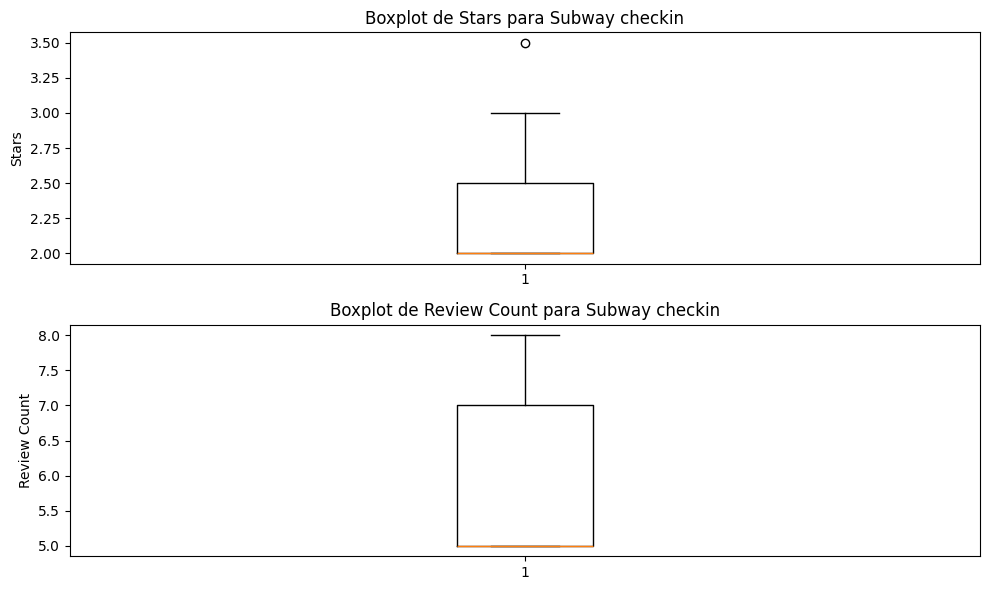

In [ ]:
subway_data_checkin = df_yelp_checkin[df_yelp_checkin['name']==('Subway')]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_data_checkin['stars'])
plt.title('Boxplot de Stars para Subway checkin')
plt.ylabel('Stars')

plt.subplot(2, 1, 2)
plt.boxplot(subway_data_checkin['review_count'])
plt.title('Boxplot de Review Count para Subway checkin')
plt.ylabel('Review Count')

plt.tight_layout()
plt.show()

In [ ]:
df_yelp_checkin[(df_yelp_checkin['name'] == 'Subway') & (df_yelp_checkin['stars'] == 3.5)]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
1712,Om6OwVsJ_t2XHQBYKnlcHg,Subway,10551 Kingsway Avenue,Edmonton,PA,T5H 4K1,53.557377,-113.502513,3.5,5,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '9:0-22:0', 'Monday': '9:0-22:0', '...",2019-09-09 02:37:26


Vamos a quitar todas aquellas categorias que solo se repiten una vez, pero primero vamos a recorrerlas para tener una noción de lo que tratan

In [ ]:
categorias = df_yelp_checkin['categories'].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:89]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")


Las menos repetidas son:
Wine Tours: 2 veces
Burmese: 2 veces
Polish: 2 veces
Home Decor: 2 veces
Champagne Bars: 2 veces
Ethnic Food: 2 veces
Books: 2 veces
Naturopathic/Holistic: 2 veces
Piano Bars: 2 veces
Nicaraguan: 2 veces
Cooking Classes: 2 veces
Hair Salons: 2 veces
Cigar Bars: 2 veces
Music & Video: 2 veces
Do-It-Yourself Food: 2 veces
Jazz & Blues: 2 veces
Couriers & Delivery Services: 2 veces
Day Spas: 2 veces
Airport Lounges: 2 veces
Adult Entertainment: 2 veces
Pet Services: 2 veces
Fashion: 2 veces
Tobacco Shops: 2 veces
Massage Therapy: 2 veces
Wedding Planning: 2 veces
Accessories: 2 veces
Vitamins & Supplements: 2 veces
Wigs: 2 veces
Dive Bars: 2 veces
Basque: 2 veces
Macarons: 2 veces
Gift Shops: 2 veces
Flowers & Gifts: 2 veces
Herbs & Spices: 2 veces
Art Galleries: 2 veces
Education: 2 veces
Portuguese: 2 veces
Mags: 2 veces
Nutritionists: 2 veces
Sporting Goods: 2 veces
Argentine: 2 veces
Malaysian: 2 veces
Shanghainese: 2 veces
Cambodian: 3 veces
Cannabis Dispensa

Al ser obsoletas todos, prodecemos a su extracción

In [ ]:
categorias = df_yelp_checkin['categories'].str.split(', ').explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[frecuencia_categorias == 1].index.tolist()
def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(', ')
    categorias_filtradas = [categoria for categoria in categorias_lista if categoria not in categorias_solo_una_vez]
    return ', '.join(categorias_filtradas)
df_yelp_checkin['categories'] = df_yelp_checkin['categories'].apply(filtrar_categorias)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_checkin.head()

DataFrame modificado eliminando las categorías que se repiten solo una vez:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."
1,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,PA,37203,36.148371,-86.798895,3.5,159,False,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Friday': '7:0-17:0', 'Monday': '7:0-17:0', '...","2017-06-18 17:23:58, 2017-06-20 23:47:06, 2017..."
2,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.508780,5.0,20,False,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Friday': '10:0-20:0', 'Monday': '0:0-0:0', '...","2017-11-30 19:49:29, 2018-01-23 22:10:48, 2018..."
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,3173 Cypress Ridge Blvd,Wesley Chapel,PA,33544,28.196252,-82.380615,4.5,95,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Burgers, Sports Bars, Bars, Lounges, Restauran...","{'Friday': '11:30-23:30', 'Monday': '11:30-22:...","2018-02-09 22:40:05, 2018-03-25 21:01:21, 2018..."
4,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,1001 Poydras St,New Orleans,PA,70112,29.950647,-90.074427,4.5,350,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Nightlife, Pubs, Event Planning & Services, Wi...","{'Friday': '11:0-23:0', 'Monday': '0:0-0:0', '...","2018-08-31 19:34:29, 2018-09-05 22:46:19, 2018..."


repetimos el mismo proceso parra **df_yelp_restaurantes**

In [ ]:
subway_rest_data = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == 'Subway']

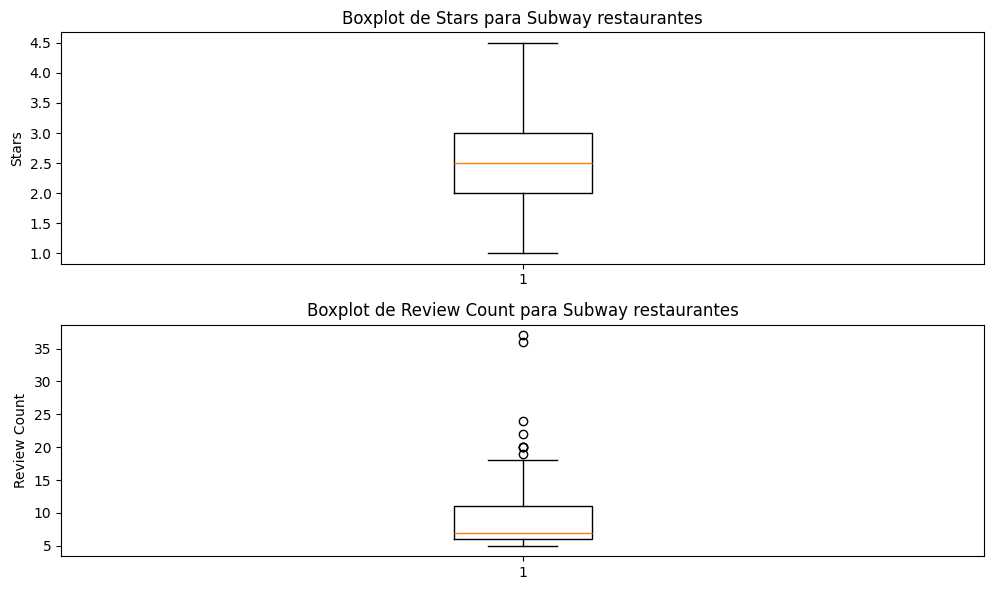

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_rest_data['stars'])
plt.title('Boxplot de Stars para Subway restaurantes')
plt.ylabel('Stars')

plt.subplot(2, 1, 2)
plt.boxplot(subway_rest_data['review_count'])
plt.title('Boxplot de Review Count para Subway restaurantes')
plt.ylabel('Review Count')

plt.tight_layout()
plt.show()

In [ ]:
df_yelp_restaurantes[(df_yelp_restaurantes['name'] == 'Subway') & (df_yelp_restaurantes['review_count'] > 17)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
13826,d-hMYlJ-hMAHSgd3KvYcWg,Subway,465 E Plumb Ln,Reno,FL,89511,39.506015,-119.797213,2.5,24,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Food Delivery Services, Restaurants, Delis, Sa...","{'Friday': '9:0-21:30', 'Monday': '9:0-21:30',..."
23139,CyctXClhoy8YamJjcE2ifg,Subway,5530 Telegraph Rd,St Louis,FL,63129,38.471225,-90.304188,1.5,22,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '10:30-19:0', 'Monday': '10:30-19:0..."
40209,lF7Zn9GNg0wMpM5g5kWdBw,Subway,5015 S Mccarran Blvd,Reno,CA,89502,39.477285,-119.783929,2.5,36,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Sandwiches, Fast Food, Restaurants","{'Friday': '7:0-17:0', 'Monday': '0:0-0:0', 'S..."
40714,3p1gTXaVUKprXnzvhq7RRA,Subway,"5055 Sun Valley Blvd, Ste 300",Sun Valley,FL,89433,39.576861,-119.781463,2.0,19,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Restaurants, Sandwiches","{'Friday': '10:0-21:0', 'Monday': '10:0-20:30'..."
42625,An_QUi1YfPUf5kXJEgZMeQ,Subway,"5480 E Speedway Blvd, Ste C102",Tucson,FL,85712,32.235828,-110.875841,3.0,18,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '7:0-18:0', 'Monday': '0:0-0:0', 'S..."
47599,mwRqQENSKmBIGZEfWRzX5g,Subway,"6688 Nolensville Pike Rd, Ste 212",Brentwood,FL,37027,36.000563,-86.692133,1.5,20,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Fast Food, Sandwiches","{'Friday': '9:0-21:0', 'Monday': '0:0-0:0', 'S..."
53630,9_DJMSzn5PtMit78KFrwaw,Subway,237 N Peters,New Orleans,PA,70130,29.953171,-90.065352,2.5,18,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '9:0-18:30', 'Monday': '9:0-18:30',..."
66109,7e4PHzKqvtxcbxcXy6Jn3g,Subway,1151 S Kingshighway Blvd,St Louis,PA,63110,38.627035,-90.265107,2.5,20,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Sandwiches, Fast Food","{'Friday': '10:0-20:0', 'Monday': '10:0-20:0',..."
75582,2qg67Mq6cKjl1GPbls32Dg,Subway,"1131 Steamboat Pkwy, Ste 800",Reno,FL,89521,39.423295,-119.738617,3.0,37,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '10:0-19:0', 'Monday': '10:0-19:0',..."
75665,y98y26WYSZqYCLXH-uQRLA,Subway,909 Indiana Ave,Indianapolis,FL,46202,39.779847,-86.172692,2.0,20,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '9:30-22:0', 'Monday': '9:30-22:0',..."


Eliminacion de etiquetas de categoría obsoletos

In [ ]:
categorias = df_yelp_restaurantes['categories'].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:167]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")

Las menos repetidas son:
Advertising: 2 veces
Rafting/Kayaking: 2 veces
Office Cleaning: 2 veces
Waxing: 2 veces
Body Shops: 2 veces
Hardware Stores: 2 veces
Playgrounds: 2 veces
Adult Education: 2 veces
Leisure Centers: 2 veces
Web Design: 2 veces
Wine Tours: 2 veces
Auto Glass Services: 2 veces
Interior Design: 2 veces
Honey: 2 veces
Gun/Rifle Ranges: 2 veces
Paint & Sip: 2 veces
Dry Cleaning & Laundry: 2 veces
Pool & Billiards: 2 veces
Motorcycle Dealers: 2 veces
Tableware: 2 veces
Sports Wear: 2 veces
Building Supplies: 2 veces
Bike Repair/Maintenance: 2 veces
Banks & Credit Unions: 2 veces
Team Building Activities: 2 veces
Pet Sitting: 2 veces
Tattoo: 2 veces
Hunting & Fishing Supplies: 2 veces
Home Organization: 2 veces
Traditional Chinese Medicine: 2 veces
Country Dance Halls: 2 veces
Shaved Snow: 2 veces
Junk Removal & Hauling: 2 veces
Mass Media: 2 veces
Laundry Services: 2 veces
Airports: 2 veces
Children's Clothing: 2 veces
IT Services & Computer Repair: 2 veces
Pest Control

In [ ]:
categorias = df_yelp_restaurantes['categories'].str.split(', ').explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[frecuencia_categorias == 1].index.tolist()

def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(', ')
    categorias_filtradas = [categoria for categoria in categorias_lista if categoria not in categorias_solo_una_vez]
    return ', '.join(categorias_filtradas)

df_yelp_restaurantes['categories'] = df_yelp_restaurantes['categories'].apply(filtrar_categorias)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_restaurantes.head()


DataFrame modificado eliminando las categorías que se repiten solo una vez:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,False,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Food, Delis, Italian, Bakeries, Restaurants","{'Friday': '10:0-20:0', 'Monday': '10:0-18:0',..."
22,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,PA,46250,39.904320,-86.053080,4.0,20,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Steakhouses, Asian Fusion, Restaurants","{'Friday': '11:0-21:0', 'Monday': '11:0-21:0',..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,False,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Friday': '12:0-2:0', 'Monday': '16:0-0:0', '..."
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pizza, Chicken Wings, Sandwiches, Restaurants","{'Friday': '10:0-1:0', 'Monday': '10:0-0:0', '..."


Repetimos una vez mas el procedimiento pero esta vez con ***df_yelp_tips***

In [ ]:
subway_data_tips = df_yelp_tips[df_yelp_tips['name']== 'Subway']

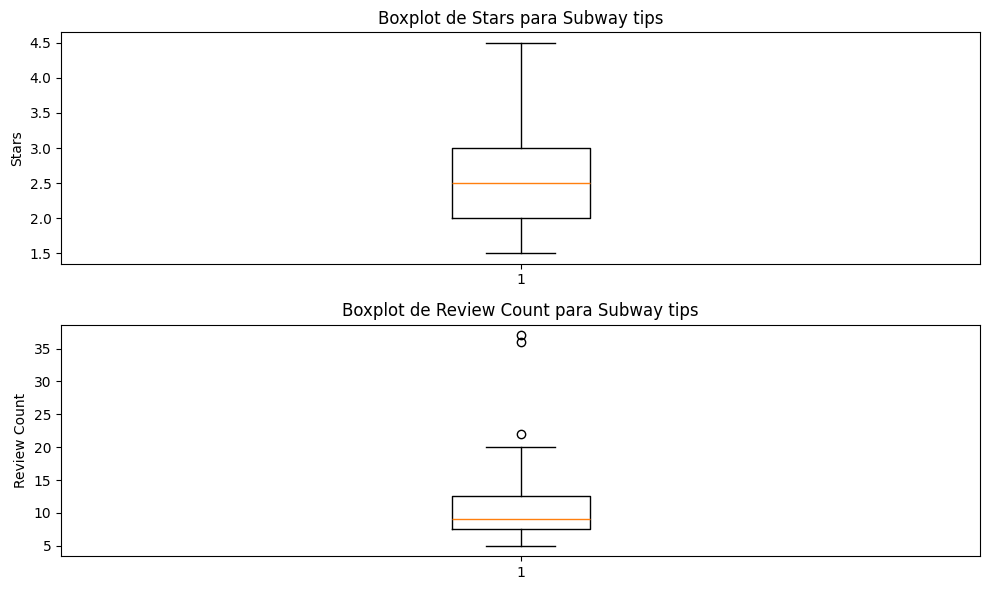

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_data_tips['stars'])
plt.title('Boxplot de Stars para Subway tips')
plt.ylabel('Stars')

plt.subplot(2, 1, 2)
plt.boxplot(subway_data_tips['review_count'])
plt.title('Boxplot de Review Count para Subway tips')
plt.ylabel('Review Count')

plt.tight_layout()
plt.show()

In [ ]:
df_yelp_tips[(df_yelp_tips['name'] == 'Subway') & (df_yelp_tips['review_count'] > 20)]


,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
52635,orB78QDImDsusooQud9hFw,2qg67Mq6cKjl1GPbls32Dg,Wow! Such amazing customer service. Great job ...,2019-09-05 20:12:50,0,Subway,"1131 Steamboat Pkwy, Ste 800",Reno,FL,89521,39.423295,-119.738617,3.0,37,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '10:0-19:0', 'Monday': '10:0-19:0',..."
59529,xHVwBmvuBEbmV0c4NU2Hwg,CyctXClhoy8YamJjcE2ifg,The old owner was horrible. The new owner is a...,2018-09-16 17:42:52,0,Subway,5530 Telegraph Rd,St Louis,FL,63129,38.471225,-90.304188,1.5,22,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '10:30-19:0', 'Monday': '10:30-19:0..."
63459,HT6tAhRKfcrqRb9T118HEA,lF7Zn9GNg0wMpM5g5kWdBw,Long line...went very fast! All were friendly!,2017-04-26 19:18:47,0,Subway,5015 S Mccarran Blvd,Reno,CA,89502,39.477285,-119.783929,2.5,36,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Sandwiches, Fast Food, Restaurants","{'Friday': '7:0-17:0', 'Monday': '0:0-0:0', 'S..."


Una vez mas, repetimos el proceso en las categorías 

In [ ]:
categorias = df_yelp_tips['categories'].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:44]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")

Las menos repetidas son:
Brewing Supplies: 2 veces
Advertising: 2 veces
Kids Hair Salons: 2 veces
Lawyers: 2 veces
Office Cleaning: 2 veces
Mobile Phone Repair: 2 veces
Eyebrow Services: 2 veces
Laser Tag: 2 veces
Landscaping: 2 veces
Homeowner Association: 2 veces
Recording & Rehearsal Studios: 2 veces
Propane: 2 veces
Auto Glass Services: 2 veces
Nail Salons: 2 veces
Auto Repair: 2 veces
Dietitians: 2 veces
Mobile Phones: 2 veces
Music Production Services: 2 veces
Ice Delivery: 2 veces
Hostels: 2 veces
Home Cleaning: 2 veces
Chiropractors: 2 veces
Sports Clubs: 2 veces
Art Museums: 2 veces
Weight Loss Centers: 2 veces
Fuzhou: 2 veces
IT Services & Computer Repair: 2 veces
Guest Houses: 2 veces
Car Wash: 2 veces
LAN Centers: 2 veces
Amateur Sports Teams: 2 veces
Golf Equipment: 2 veces
Senegalese: 2 veces
Threading Services: 2 veces
Outdoor Furniture Stores: 2 veces
Shoe Stores: 2 veces
Electronics: 2 veces
Plumbing: 2 veces
Egyptian: 2 veces
Antiques: 3 veces
Tasting Classes: 3 veces

In [ ]:
categorias = df_yelp_tips['categories'].str.split(', ').explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[frecuencia_categorias == 1].index.tolist()

def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(', ')
    categorias_filtradas = [categoria for categoria in categorias_lista if categoria not in categorias_solo_una_vez]
    return ', '.join(categorias_filtradas)
df_yelp_tips['categories'] = df_yelp_tips['categories'].apply(filtrar_categorias)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_tips.head()

DataFrame modificado eliminando las categorías que se repiten solo una vez:


,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1viszljzsa8W7VnYPuWosw,Zg83olSjsdXAhE5EEy5IcQ,Order crispy and they bake it up good.,2018-04-01 01:40:12,0,Oregano's,100 W Orange Grove Rd,Tucson,PA,85704,32.323157,-110.973652,3.5,385,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Italian, Pizza","{'Friday': '11:0-22:0', 'Monday': '0:0-0:0', '..."
1,YnlCpuaBa3qWBp4te8pGmA,XIKYdKWq72zUYsq8NBxcCQ,The honey glazed salmon is amazing!,2018-01-14 15:00:01,0,Aksum Cafe,4630 Baltimore Ave,Philadelphia,PA,19143,39.948547,-75.216366,4.0,393,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Mediterranean, Vegetarian, American (New), Res...","{'Friday': '16:0-21:0', 'Monday': '0:0-0:0', '..."
2,IE0f4Mt6rfEw26pn598doA,aPD0HkuA7MXNhZZqXiGF4g,Great fish and chips!!,2017-09-30 22:39:11,0,McCreary's Irish Pub and Eatery,414 Main St,Franklin,PA,37064,35.924479,-86.870951,3.5,146,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pubs, Bars, Irish Pub, Irish, American (New), ...","{'Friday': '11:0-23:0', 'Monday': '11:0-22:0',..."
3,BrobnxoTkPml180NhXl6kw,zjLT8ELDYxxknQ9ZLrl6_w,Call ahead of time to make sure there isn't a ...,2017-03-18 18:22:28,0,Brunchery Restaurant & Catering,"3225 S MacDill Ave, Ste 109",Tampa,PA,33629,27.915901,-82.494764,3.5,274,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Caterers, Sandwiches, Burgers, Ev...","{'Friday': '7:0-14:0', 'Monday': '7:0-14:0', '..."
4,9XhCRgu_v7y-X2v4Av3HPA,fgnHM4VT-n1VjFL3YeBJsg,Ordered the pad Thai shrimp and it was good!,2017-08-29 17:12:23,0,Royal Thai Bistreaux,"1299 Hickory Ave, Ste A",Harahan,PA,70123,29.956544,-90.202459,4.5,171,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Thai, Restaurants","{'Friday': '16:30-21:30', 'Monday': None, 'Sat..."


A continuacion se revisará y corregirá en caso de ser necesario el tipo de dato de cada columna

In [ ]:
df_yelp_users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,14


In [ ]:
df_yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99015 entries, 0 to 99014
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             99015 non-null  object        
 1   name                99015 non-null  object        
 2   review_count        99015 non-null  int64         
 3   yelping_since       99015 non-null  datetime64[ns]
 4   useful              99015 non-null  int64         
 5   funny               99015 non-null  int64         
 6   cool                99015 non-null  int64         
 7   elite               99015 non-null  object        
 8   friends             99015 non-null  object        
 9   fans                99015 non-null  int64         
 10  average_stars       99015 non-null  float64       
 11  compliment_hot      99015 non-null  int64         
 12  compliment_more     99015 non-null  int64         
 13  compliment_profile  99015 non-null  int64     

In [ ]:
df_yelp_checkin.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."


In [ ]:
df_yelp_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   3330 non-null   object 
 1   name          3330 non-null   object 
 2   address       3330 non-null   object 
 3   city          3330 non-null   object 
 4   state         3330 non-null   object 
 5   postal_code   3330 non-null   object 
 6   latitude      3330 non-null   float64
 7   longitude     3330 non-null   float64
 8   stars         3330 non-null   float64
 9   review_count  3330 non-null   int64  
 10  is_open       3330 non-null   bool   
 11  attributes    3296 non-null   object 
 12  categories    3330 non-null   object 
 13  hours         3082 non-null   object 
 14  date          3330 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 367.6+ KB


In [ ]:
df_yelp_restaurantes.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."


In [ ]:
df_yelp_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22685 entries, 3 to 150339
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   22685 non-null  object 
 1   name          22685 non-null  object 
 2   address       22685 non-null  object 
 3   city          22685 non-null  object 
 4   state         22685 non-null  object 
 5   postal_code   22685 non-null  object 
 6   latitude      22685 non-null  float64
 7   longitude     22685 non-null  float64
 8   stars         22685 non-null  float64
 9   review_count  22685 non-null  int64  
 10  is_open       22685 non-null  bool   
 11  attributes    22429 non-null  object 
 12  categories    22685 non-null  object 
 13  hours         19504 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 2.4+ MB


In [ ]:
df_yelp_tips.head(1)

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1viszljzsa8W7VnYPuWosw,Zg83olSjsdXAhE5EEy5IcQ,Order crispy and they bake it up good.,2018-04-01 01:40:12,0,Oregano's,100 W Orange Grove Rd,Tucson,PA,85704,32.323157,-110.973652,3.5,385,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Italian, Pizza","{'Friday': '11:0-22:0', 'Monday': '0:0-0:0', '..."


In [ ]:
df_yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69346 entries, 0 to 69345
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           69346 non-null  object 
 1   business_id       69346 non-null  object 
 2   text              69346 non-null  object 
 3   date              69346 non-null  object 
 4   compliment_count  69346 non-null  int64  
 5   name              69346 non-null  object 
 6   address           69346 non-null  object 
 7   city              69346 non-null  object 
 8   state             69346 non-null  object 
 9   postal_code       69346 non-null  object 
 10  latitude          69346 non-null  float64
 11  longitude         69346 non-null  float64
 12  stars             69346 non-null  float64
 13  review_count      69346 non-null  int64  
 14  is_open           69346 non-null  bool   
 15  attributes        69301 non-null  object 
 16  categories        69346 non-null  object

In [ ]:
df_yelp_reviews.head(3)

,review_id,user_id,business_id,stars,funny,cool,text,date
0,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,0,1,I was really between 3 and 4 stars for this on...,2018-07-17
2,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5,0,1,Great staff always helps and always nice. Alwa...,2017-05-26


In [ ]:
df_yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558655 entries, 0 to 558654
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    558655 non-null  object
 1   user_id      558655 non-null  object
 2   business_id  558655 non-null  object
 3   stars        558655 non-null  int8  
 4   funny        558655 non-null  int8  
 5   cool         558655 non-null  int8  
 6   text         558655 non-null  object
 7   date         558655 non-null  object
dtypes: int8(3), object(5)
memory usage: 22.9+ MB


Los formatos se encuentran en su mayoria en el estado correcto, se harán los siguientes cambios
- ### df_yelp_checkin, df_yelp_restaurantes df_yelp_tips:
 Se cambia el formato de la columna *is_open* de Entero a Booleano puesto sus datos eran 1 y 0
 - ### df_yelp_users, df_yelp_reviews: 
 En las columnas *yelping_since* (referencia a la fecha de creción del usuario) y *date* (referencia de la fecha de posteo de la reseña) se les quita la hora puesto que es un dato obsoleto y se cambia su formato a Datetime

In [ ]:
df_yelp_checkin['is_open'] = df_yelp_checkin['is_open'].astype(bool)
df_yelp_restaurantes['is_open'] = df_yelp_restaurantes['is_open'].astype(bool)
df_yelp_tips['is_open'] = df_yelp_tips['is_open'].astype(bool)

In [ ]:
df_yelp_users['yelping_since'] = pd.to_datetime(df_yelp_users['yelping_since'])
df_yelp_reviews['date'] = pd.to_datetime(df_yelp_reviews['date'])
df_yelp_reviews['date'] = df_yelp_reviews['date'].dt.date

A continuación revisaremos las latitudes y longitudes de los dataframes, con la ayuda de geopandas

En ambos casos (df_yelp_restaurantes y df_yelp_tips) encontramos que hay datos que corresponden a una ciudad de Canadá, datos que serán extraidos


In [ ]:
df_yelp_restaurantes.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."


C:\Users\misag\AppData\Local\Temp\ipykernel_12472\262260019.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


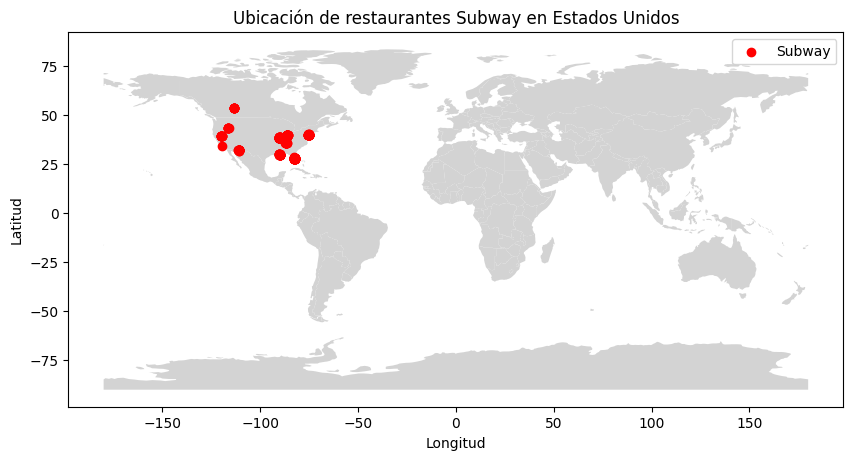

In [ ]:
subway_df_rest = df_yelp_restaurantes[df_yelp_restaurantes['name']== 'Subway']
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color='lightgrey')
ax.scatter(subway_df_rest['longitude'], subway_df_rest['latitude'], color='red', label='Subway')
plt.title('Ubicación de restaurantes Subway en Estados Unidos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [ ]:
df_yelp_restaurantes = df_yelp_restaurantes.drop(df_yelp_restaurantes[(df_yelp_restaurantes['latitude'] > 50)].index)


C:\Users\misag\AppData\Local\Temp\ipykernel_12472\3937776555.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


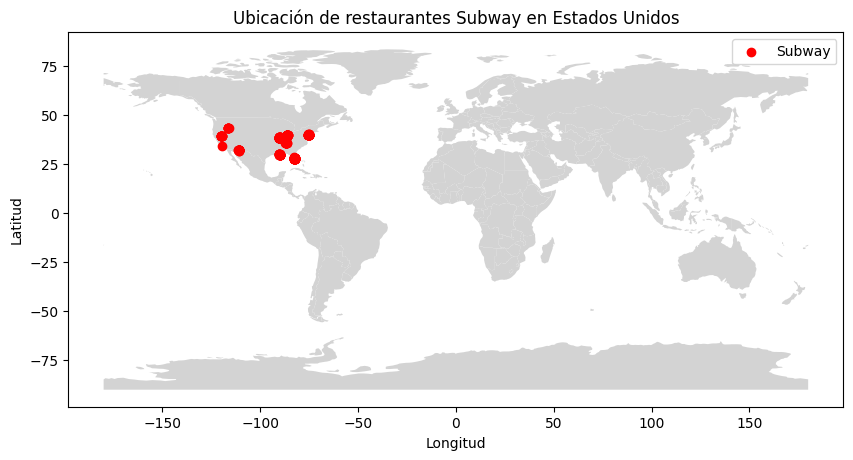

In [ ]:
subway_df = df_yelp_restaurantes[df_yelp_restaurantes['name']== 'Subway']
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color='lightgrey')
ax.scatter(subway_df['longitude'], subway_df['latitude'], color='red', label='Subway')
plt.title('Ubicación de restaurantes Subway en Estados Unidos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

C:\Users\misag\AppData\Local\Temp\ipykernel_12472\2312680780.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


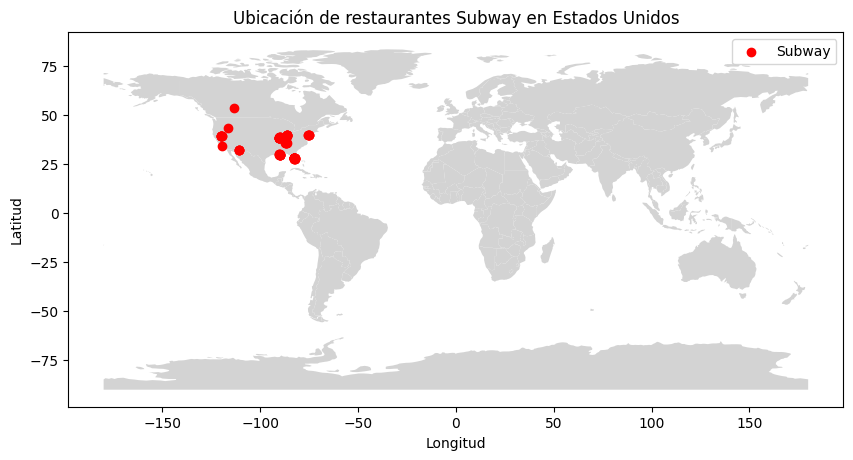

In [ ]:
subway_df_tips = df_yelp_tips[df_yelp_tips['name']== 'Subway']
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color='lightgrey')
ax.scatter(subway_df_tips['longitude'], subway_df_tips['latitude'], color='red', label='Subway')
plt.title('Ubicación de restaurantes Subway en Estados Unidos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [ ]:
df_yelp_tips = df_yelp_tips.drop(df_yelp_tips[(df_yelp_tips['latitude'] > 50)].index)

C:\Users\misag\AppData\Local\Temp\ipykernel_12472\2312680780.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


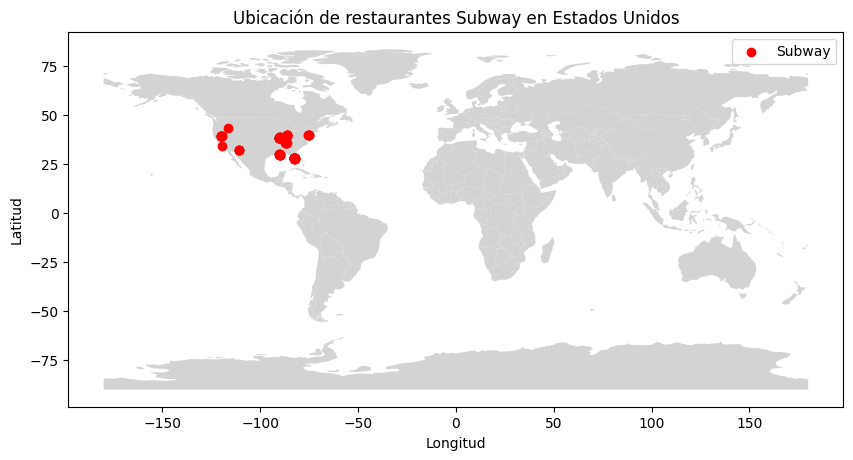

In [ ]:
subway_df_tips = df_yelp_tips[df_yelp_tips['name']== 'Subway']
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color='lightgrey')
ax.scatter(subway_df_tips['longitude'], subway_df_tips['latitude'], color='red', label='Subway')
plt.title('Ubicación de restaurantes Subway en Estados Unidos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

# Verificacion de valores nulos

Visualizamos los valores nulos de manera grafica con un mapa de calor

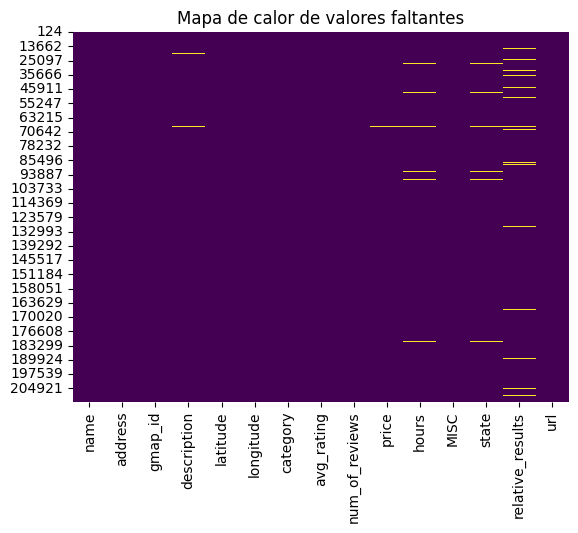

In [ ]:
sns.heatmap(df_maps_restaurantes.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

Analizamos el porcentaje de valores nulos presentes en cada columna

In [ ]:
porcnull_rest = df_maps_restaurantes.isnull().mean() * 100
columnasnull_rest = porcnull_rest[porcnull_rest > 0]
columnasnull_rest

description         0.660602
price               0.638943
hours               1.299545
state               1.299545
relative_results    4.927442
dtype: float64

Desechamos las columnas irrelevantes con un porcentaje alto de valores nulos 

In [ ]:
df_maps_rest_mod = df_maps_restaurantes.drop(['description','price'],axis=1)

Se rellenan los valores nulos 

In [ ]:
df_maps_rest_mod['hours'] = df_maps_rest_mod['hours'].fillna("").apply(list)
df_maps_rest_mod['state'].fillna(value='N/A',inplace=True)
df_maps_rest_mod['address'].fillna(value='N/A',inplace=True)
df_maps_rest_mod['MISC'] = df_maps_rest_mod['MISC'].fillna("").apply(dict)
df_maps_rest_mod['relative_results'] = df_maps_rest_mod['relative_results'].fillna("").apply(list)

C:\Users\misag\AppData\Local\Temp\ipykernel_12472\457683999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_maps_rest_mod['state'].fillna(value='N/A',inplace=True)
C:\Users\misag\AppData\Local\Temp\ipykernel_12472\457683999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Se verifica la ausencia de valores nulos

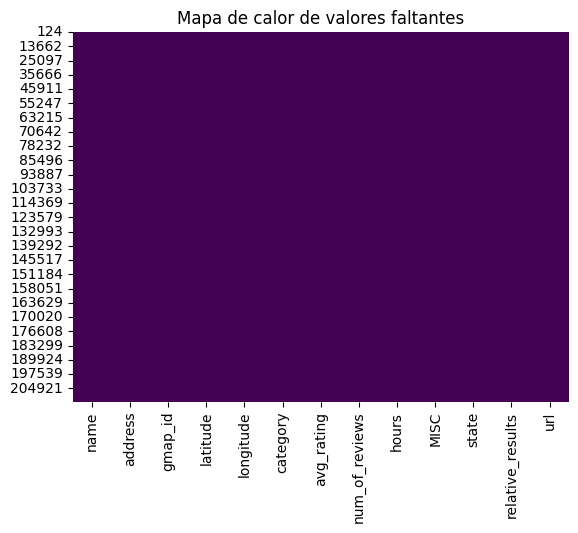

In [ ]:
sns.heatmap(df_maps_rest_mod.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

Se realiza el mismo procedimiento

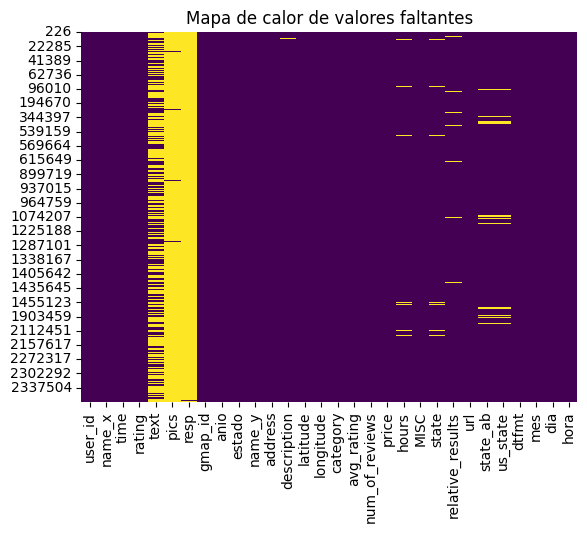

In [ ]:
sns.heatmap(df_maps_reviews.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [ ]:
porcnull_review = df_maps_reviews.isnull().mean() * 100
columnasnull_review = porcnull_review[porcnull_review > 0]
columnasnull_review

text                51.592762
pics                98.825178
resp                99.732416
description          0.076453
price                0.061162
hours                1.383792
state                1.383792
relative_results     1.969929
state_ab             3.802243
us_state             3.802243
dtype: float64

In [ ]:
df_maps_reviews_mod = df_maps_reviews.drop(['pics','resp'],axis=1)

In [ ]:
df_maps_reviews_mod['text'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['address'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['description'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['price'].fillna(value='-',inplace=True)
df_maps_reviews_mod['hours'] = df_maps_reviews_mod['hours'].fillna("").apply(list)
df_maps_reviews_mod['MISC'] = df_maps_reviews_mod['MISC'].fillna("").apply(dict)
df_maps_reviews_mod['state'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['relative_results'] = df_maps_reviews_mod['relative_results'].fillna("").apply(list)
df_maps_reviews_mod['state_ab'].fillna(value='N/A',inplace=True)
df_maps_reviews_mod['us_state'].fillna(value='N/A',inplace=True)

226        $
227        $
228        $
229        $
230        $
          ..
2389571    $
2389572    $
2389573    $
2389574    $
2389575    $
Name: price, Length: 39240, dtype: category
Categories (2, object): ['$', '₩']


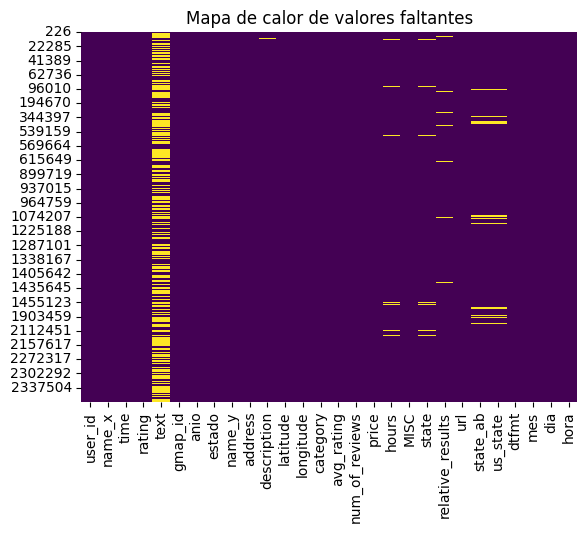

In [310]:
sns.heatmap(df_maps_reviews_mod.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

# Comprobar distribucion de los datos

In [311]:
df_yelp_reviews['stars'].describe()

count    558655.000000
mean          3.695087
std           1.545186
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

La mayoría de las clasificaciones se encuentran en la categoría de 5 estrellas, mientras las clasificaciones de 1 y 2 estrellas son significativamente menores en comparación, lo que sugiere que la mayoría de los usuarios tienden a expresar opiniones muy favorables por encima de las negativas.

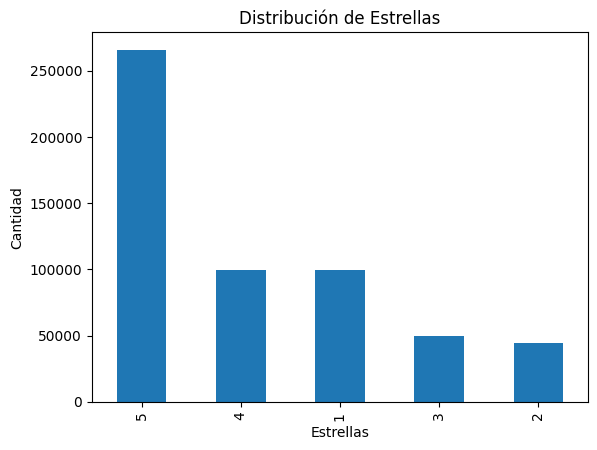

In [312]:
df_yelp_reviews['stars'].value_counts().plot(kind='bar')
plt.title('Distribución de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Cantidad')
plt.show()

In [313]:
df_yelp_reviews['funny'].describe()

count    558655.000000
mean          0.171396
std           0.514744
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          43.000000
Name: funny, dtype: float64

Nos indica que casi el 90% de las reseñas carecen de votaciones 'funny'

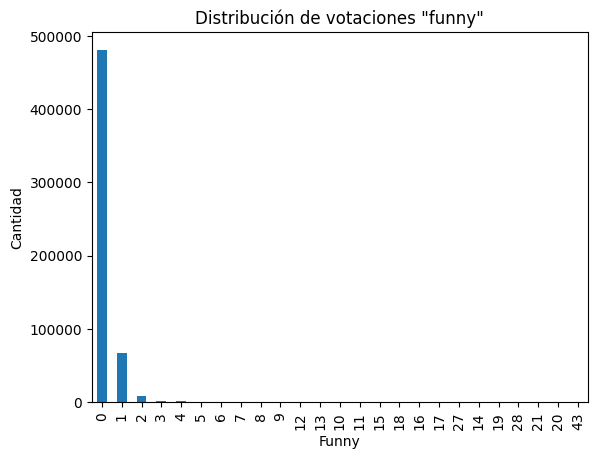

In [314]:
df_yelp_reviews['funny'].value_counts().plot(kind='bar')
plt.title('Distribución de votaciones "funny"')
plt.xlabel('Funny')
plt.ylabel('Cantidad')
plt.show()

In [315]:
df_yelp_reviews['cool'].describe()

count    558655.000000
mean          0.366860
std           0.616285
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          26.000000
Name: cool, dtype: float64

Al rededor del 70% de reseñas no cuentan con votaciones 'cool'

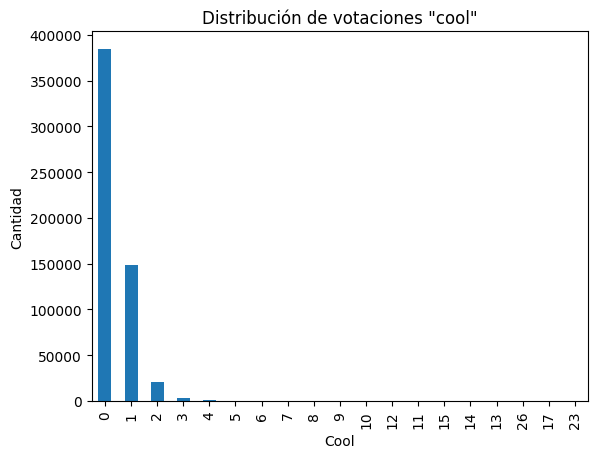

In [316]:
df_yelp_reviews['cool'].value_counts().plot(kind='bar')
plt.title('Distribución de votaciones "cool"')
plt.xlabel('Cool')
plt.ylabel('Cantidad')
plt.show()

In [317]:
df_yelp_users['review_count'].describe()

count    99015.000000
mean       281.001111
std        364.432217
min          1.000000
25%        106.000000
50%        178.000000
75%        325.000000
max      17473.000000
Name: review_count, dtype: float64

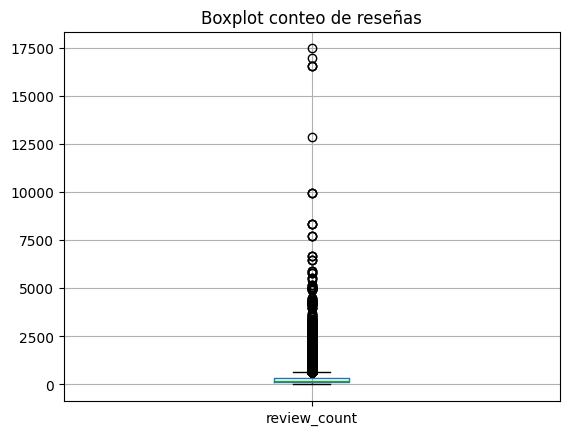

In [318]:
df_yelp_users.boxplot(column='review_count')
plt.title('Boxplot conteo de reseñas')
plt.show()

In [319]:
df_yelp_users['useful'].describe()

count     99015.000000
mean        836.042206
std        3269.671606
min           0.000000
25%         129.000000
50%         269.000000
75%         622.000000
max      206296.000000
Name: useful, dtype: float64

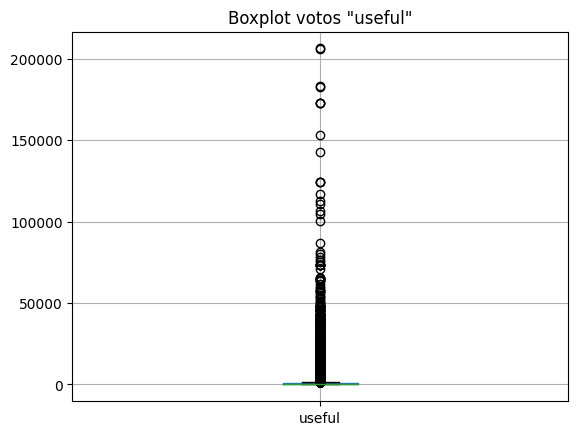

In [320]:
df_yelp_users.boxplot(column='useful')
plt.title('Boxplot votos "useful"')
plt.show()

In [321]:
df_yelp_users['funny'].describe()

count     99015.000000
mean        382.725425
std        2077.998281
min           0.000000
25%          27.000000
50%          72.000000
75%         208.000000
max      185823.000000
Name: funny, dtype: float64

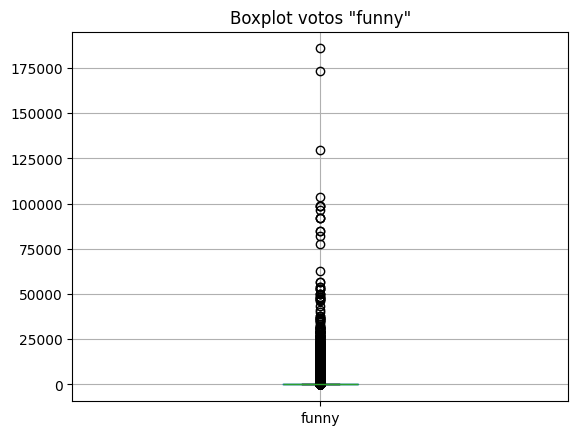

In [322]:
df_yelp_users.boxplot(column='funny')
plt.title('Boxplot votos "funny"')
plt.show()

In [323]:
df_yelp_users['cool'].describe()

count     99015.000000
mean        558.009049
std        2860.711375
min           0.000000
25%          52.000000
50%         117.000000
75%         309.000000
max      199878.000000
Name: cool, dtype: float64

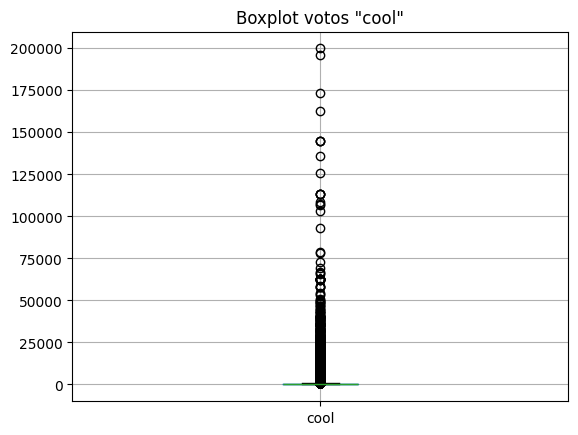

In [324]:
df_yelp_users.boxplot(column='cool')
plt.title('Boxplot votos "cool"')
plt.show()

In [325]:
df_yelp_users['fans'].describe()

count    99015.000000
mean        29.946776
std        107.443318
min          0.000000
25%          5.000000
50%         12.000000
75%         27.000000
max      12497.000000
Name: fans, dtype: float64

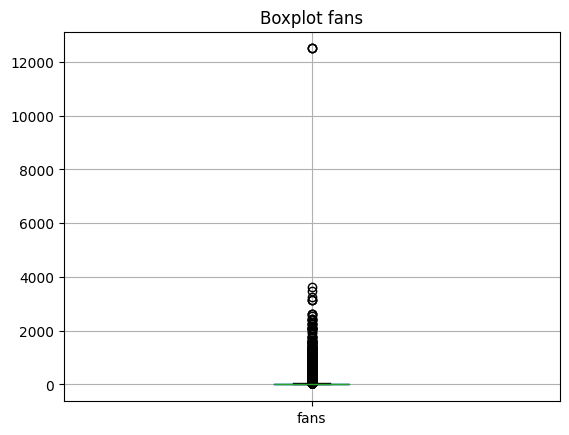

In [326]:
df_yelp_users.boxplot(column='fans')
plt.title('Boxplot fans')
plt.show()

In [327]:
df_yelp_users['average_stars'].describe()

count    99015.000000
mean         3.942432
std          0.347025
min          2.310000
25%          3.710000
50%          3.940000
75%          4.180000
max          5.000000
Name: average_stars, dtype: float64

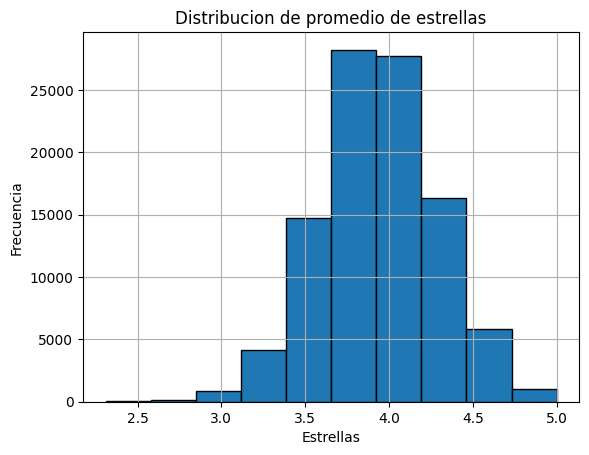

In [328]:
df_yelp_users['average_stars'].hist(bins=10, edgecolor='black')
plt.title('Distribucion de promedio de estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.show()

In [329]:
df_yelp_users['compliment_hot'].describe()

count    99015.000000
mean        46.490259
std        349.486881
min          0.000000
25%          1.000000
50%          5.000000
75%         16.000000
max      25784.000000
Name: compliment_hot, dtype: float64

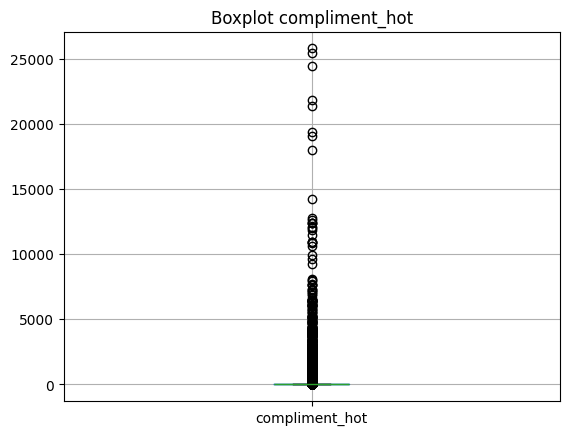

In [330]:
df_yelp_users.boxplot(column='compliment_hot')
plt.title('Boxplot compliment_hot')
plt.show()

In [331]:
df_yelp_users['compliment_more'].describe()

count    99015.000000
mean         6.154977
std         43.253374
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max       4347.000000
Name: compliment_more, dtype: float64

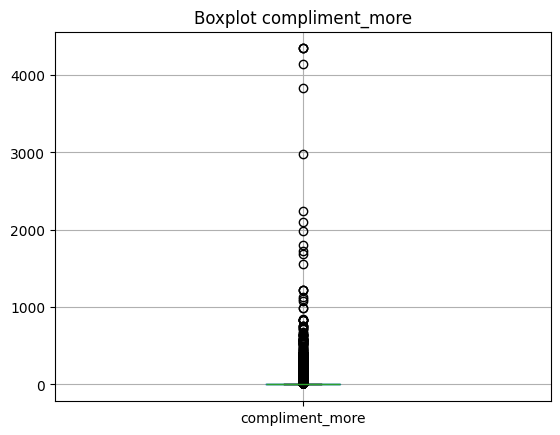

In [332]:
df_yelp_users.boxplot(column='compliment_more')
plt.title('Boxplot compliment_more')
plt.show()

In [333]:
df_yelp_users['compliment_profile'].describe()

count    99015.000000
mean         4.347543
std         58.900780
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       7039.000000
Name: compliment_profile, dtype: float64

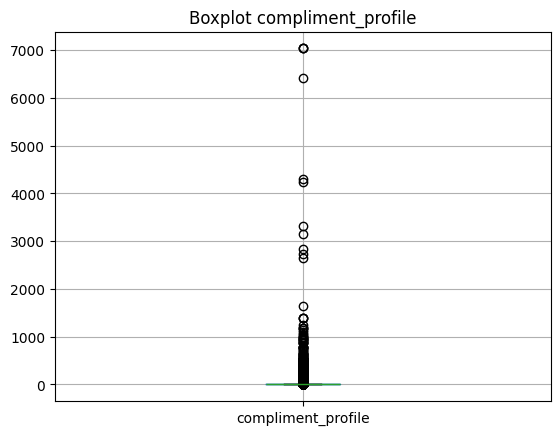

In [334]:
df_yelp_users.boxplot(column='compliment_profile')
plt.title('Boxplot compliment_profile')
plt.show()

In [335]:
df_yelp_users['compliment_cute'].describe()

count    99015.000000
mean         3.225966
std         29.845040
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       2974.000000
Name: compliment_cute, dtype: float64

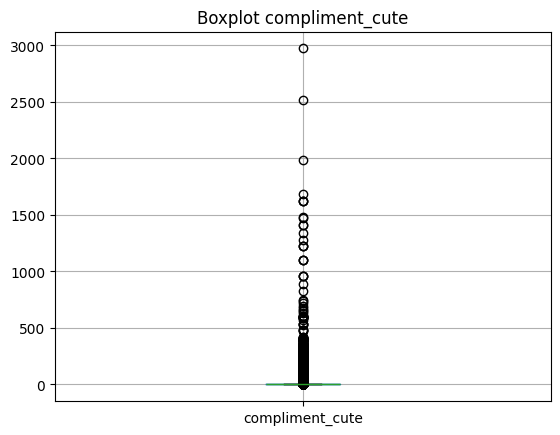

In [336]:
df_yelp_users.boxplot(column='compliment_cute')
plt.title('Boxplot compliment_cute')
plt.show()

In [337]:
df_yelp_users['compliment_list'].describe()

count    99015.000000
mean         1.684826
std         23.612298
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2607.000000
Name: compliment_list, dtype: float64

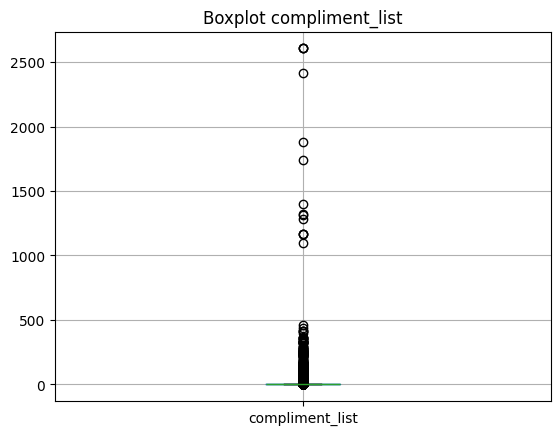

In [338]:
df_yelp_users.boxplot(column='compliment_list')
plt.title('Boxplot compliment_list')
plt.show()

In [339]:
df_yelp_users['compliment_note'].describe()

count    99015.000000
mean        32.722769
std        274.395327
min          0.000000
25%          3.000000
50%          7.000000
75%         18.000000
max      59031.000000
Name: compliment_note, dtype: float64

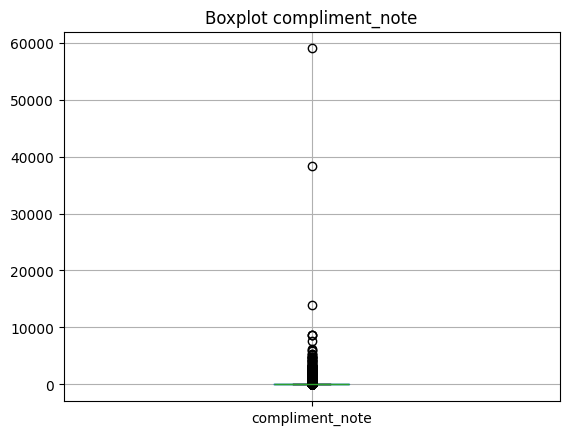

In [340]:
df_yelp_users.boxplot(column='compliment_note')
plt.title('Boxplot compliment_note')
plt.show()

In [341]:
df_yelp_users['compliment_plain'].describe()

count     99015.000000
mean         76.084391
std         614.067347
min           0.000000
25%           4.000000
50%           9.000000
75%          25.000000
max      101097.000000
Name: compliment_plain, dtype: float64

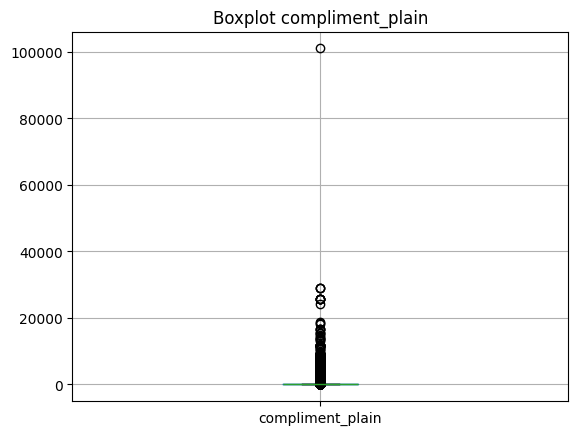

In [342]:
df_yelp_users.boxplot(column='compliment_plain')
plt.title('Boxplot compliment_plain')
plt.show()

In [343]:
df_yelp_users['compliment_cool'].describe()

count    99015.000000
mean        71.561986
std        463.551727
min          0.000000
25%          4.000000
50%         10.000000
75%         29.000000
max      49967.000000
Name: compliment_cool, dtype: float64

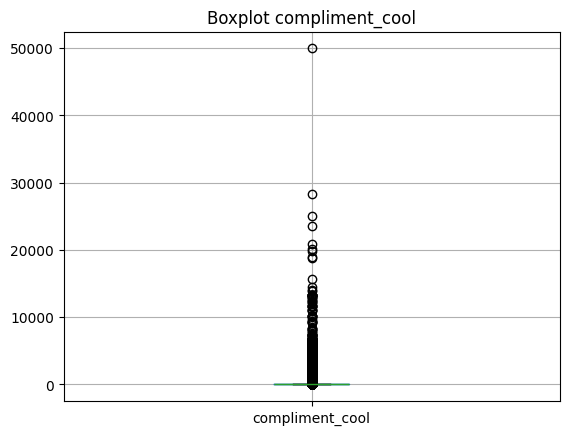

In [344]:
df_yelp_users.boxplot(column='compliment_cool')
plt.title('Boxplot compliment_cool')
plt.show()

In [345]:
df_yelp_users['compliment_funny'].describe()

count    99015.000000
mean        71.561986
std        463.551727
min          0.000000
25%          4.000000
50%         10.000000
75%         29.000000
max      49967.000000
Name: compliment_funny, dtype: float64

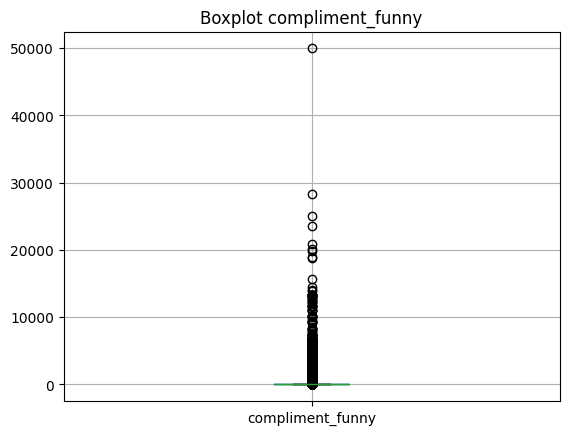

In [346]:
df_yelp_users.boxplot(column='compliment_funny')
plt.title('Boxplot compliment_funny')
plt.show()

In [347]:
df_yelp_users['compliment_writer'].describe()

count    99015.000000
mean        26.784800
std        157.101787
min          0.000000
25%          2.000000
50%          6.000000
75%         16.000000
max      15934.000000
Name: compliment_writer, dtype: float64

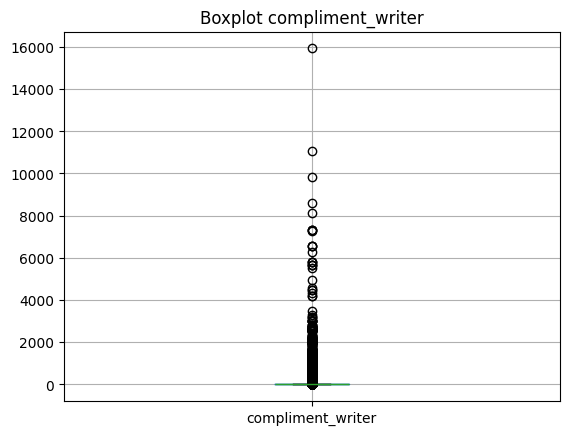

In [348]:
df_yelp_users.boxplot(column='compliment_writer')
plt.title('Boxplot compliment_writer')
plt.show()

In [349]:
df_yelp_users['compliment_photos'].describe()

count    99015.000000
mean        27.894723
std        352.241900
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max      56104.000000
Name: compliment_photos, dtype: float64

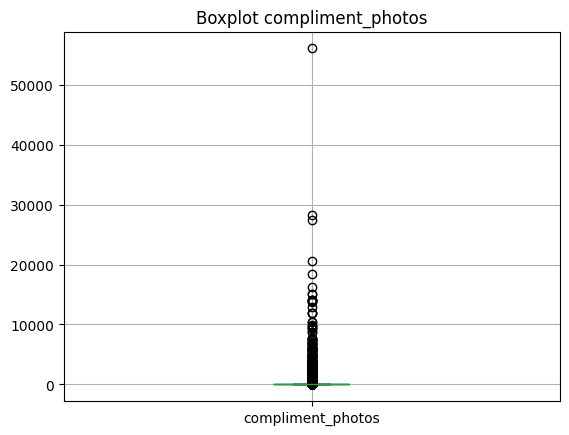

In [350]:
df_yelp_users.boxplot(column='compliment_photos')
plt.title('Boxplot compliment_photos')
plt.show()

In [351]:
df_maps_restaurantes.to_parquet(r'Generated\Google\metada_sitios.parquet')
df_maps_reviews.to_parquet(r'Generated\Google\merge_site_reviews.parquet')
df_yelp_restaurantes.to_parquet(r'Generated\Yelp\bussines.parquet')
df_yelp_checkin.to_parquet(r'Generated\YELP\business_checkin.parquet')
df_yelp_tips.to_parquet(r'Generated\Yelp\business_tip.parquet')
df_yelp_reviews.to_parquet(r'Generated\Yelp\review.parquet')
df_yelp_users.to_parquet(r'Generated\Yelp\users_extracted.parquet')